In [1]:
%matplotlib inline
import os
os.environ['PY3_PROD'] = '1'
%load_ext autoreload
%autoreload 2
os.system('kinit')

1

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
from pycmqlib3.utility import dbaccess, dataseries, misc
from pycmqlib3.analytics.tstool import *
from pycmqlib3.analytics.btmetrics import *
from pycmqlib3.analytics.backtest_utils import *
from pycmqlib3.strategy.signal_repo import *

C:\dev\akshare\akshare\__init__.py:2817: UserWarning: 为了支持更多特性，请将 Pandas 升级到 2.2.0 及以上版本！
  warnings.warn(
C:\dev\akshare\akshare\__init__.py:2822: UserWarning: 为了支持更多特性，请将 Python 升级到 3.9.0 及以上版本！
  warnings.warn(


In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
matplotlib.rcParams['figure.figsize'] = (12, 8)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

# load historical data

In [5]:
tday = datetime.date(2024,7,12)

df = load_cnc_fut(tday)
spot_df = load_fun_data(tday)

start_date = df.index[0]
end_date = tday

vol_win=20
pnl_tenors = ['6m', '1y', '2y', '3y', '4y', '5y', '6y', '7y', '8y', '9y', '10y']

cdates = pd.date_range(start=start_date, end=tday, freq='D')
bdates = pd.bdate_range(start=start_date, end=end_date, freq='C', holidays=misc.CHN_Holidays)

asset_pairs = [('rb', 'i'), ('hc', 'i'), ('j', 'i'), ('j', 'jm')]
beta_ret_dict = {}
betas_dict = {}
for trade_asset, index_asset in asset_pairs:
    asset_df = df[[(index_asset, 'c1', 'close'), (trade_asset, 'c1', 'close')]].copy(deep=True).droplevel([1,2], axis=1)
    asset_df = asset_df.dropna(subset=[trade_asset]).ffill()

    for asset in asset_df:
        asset_df[f'{asset}_pct'] = asset_df[asset].pct_change().rolling(5).mean()
    asset_df['beta'] = asset_df[f'{index_asset}_pct'].rolling(244).cov(asset_df[f'{trade_asset}_pct'])/asset_df[f'{index_asset}_pct'].rolling(244).var()
    key = '_'.join([trade_asset, index_asset])
    asset_df[key] = asset_df[trade_asset].pct_change() - asset_df['beta'] * asset_df[index_asset].pct_change().fillna(0)
    beta_ret_dict[key] = asset_df[key].dropna()
    betas_dict[key] = asset_df['beta']


spot_df data saved


In [6]:
from bktest.backtest_grid_search import *

cu zn                   cu        zn
date                          
2008-01-02       NaN       NaN
2008-01-03       NaN       NaN
2008-01-04       NaN       NaN
2008-01-07       NaN       NaN
2008-01-08       NaN       NaN
...              ...       ...
2024-07-04  0.002142 -0.002142
2024-07-05  0.001228 -0.001228
2024-07-08  0.000639 -0.000639
2024-07-09  0.000321 -0.000321
2024-07-10  0.000161 -0.000161

[4014 rows x 2 columns]
sharpe        0.614410
sharpe_6m     2.650992
sharpe_1y     0.626984
sharpe_2y     0.119287
sharpe_3y     0.110754
sharpe_4y     0.292982
sharpe_5y     0.383942
sharpe_6y     0.446414
sharpe_7y     0.446886
sharpe_8y     0.691694
sharpe_9y     0.678695
sharpe_10y    0.677973
Name: total, dtype: float64
product           cu        zn
sharpe      0.384275  0.093146
sharpe_6m  -0.455581  2.693441
sharpe_1y  -1.117721  1.300907
sharpe_2y  -0.754693  0.816886
sharpe_3y  -0.640556  0.700592
sharpe_4y  -0.525391  0.719716
sharpe_5y  -0.383457  0.658033
sharpe_6y  -0.

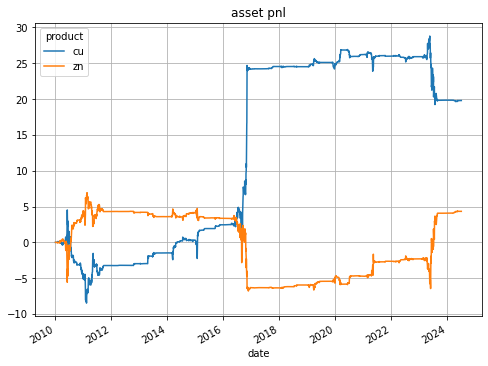

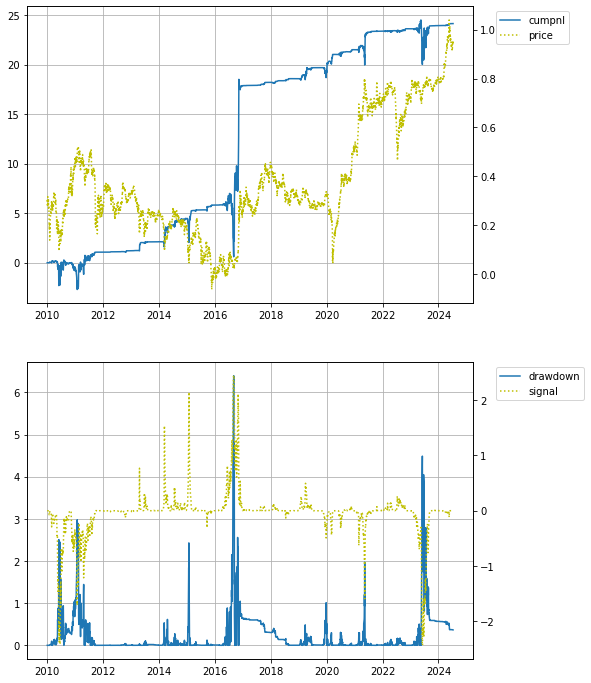

cu al                   cu        al
date                          
2008-01-02       NaN       NaN
2008-01-03       NaN       NaN
2008-01-04       NaN       NaN
2008-01-07       NaN       NaN
2008-01-08       NaN       NaN
...              ...       ...
2024-07-04 -0.023274  0.023274
2024-07-05 -0.049173  0.049173
2024-07-08 -0.046495  0.046495
2024-07-09 -0.047073  0.047073
2024-07-10 -0.060009  0.060009

[4014 rows x 2 columns]
sharpe        0.542521
sharpe_6m     0.874030
sharpe_1y     0.763244
sharpe_2y     0.684879
sharpe_3y     0.607201
sharpe_4y     0.554362
sharpe_5y     0.582282
sharpe_6y     0.552615
sharpe_7y     0.586178
sharpe_8y     0.790215
sharpe_9y     0.772011
sharpe_10y    0.744243
Name: total, dtype: float64
product           cu        al
sharpe      0.667890 -0.192783
sharpe_6m   0.752614  0.064362
sharpe_1y   0.445099  0.221207
sharpe_2y   0.242864  0.318851
sharpe_3y   0.704899 -0.130754
sharpe_4y   0.661932 -0.138516
sharpe_5y   0.630238 -0.076067
sharpe_6y   0.

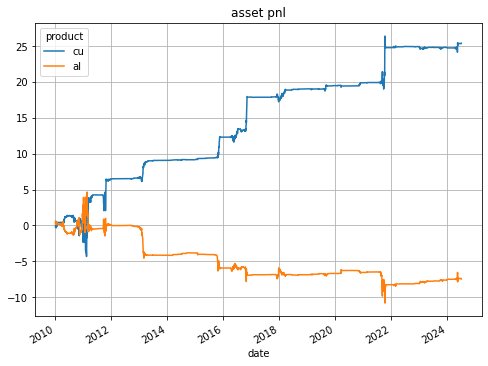

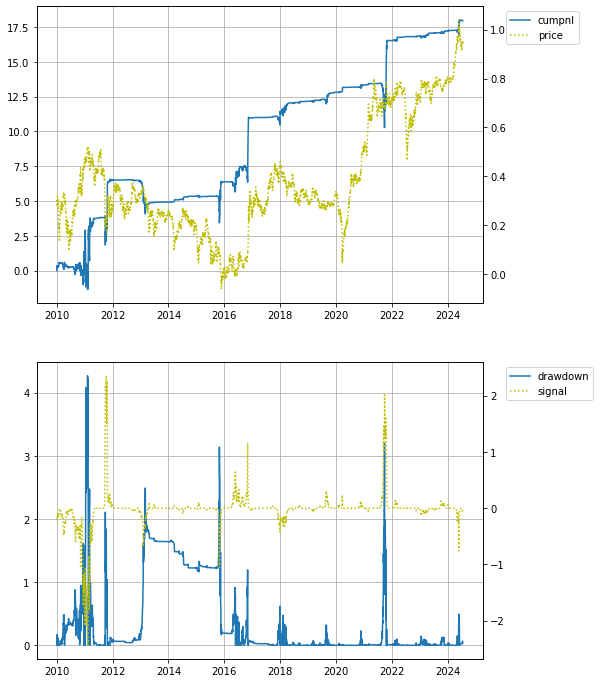

al zn                   al        zn
date                          
2008-01-02       NaN       NaN
2008-01-03       NaN       NaN
2008-01-04       NaN       NaN
2008-01-07       NaN       NaN
2008-01-08       NaN       NaN
...              ...       ...
2024-07-04  0.096042 -0.096042
2024-07-05  0.121567 -0.121567
2024-07-08  0.093823 -0.093823
2024-07-09  0.072424 -0.072424
2024-07-10  0.072210 -0.072210

[4014 rows x 2 columns]
sharpe        0.592710
sharpe_6m     0.160464
sharpe_1y     0.152125
sharpe_2y     0.606620
sharpe_3y     0.521687
sharpe_4y     0.523797
sharpe_5y     0.779222
sharpe_6y     0.860163
sharpe_7y     0.673741
sharpe_8y     0.727987
sharpe_9y     0.700017
sharpe_10y    0.875125
Name: total, dtype: float64
product           al        zn
sharpe      0.134490  0.412865
sharpe_6m  -0.708023  1.319706
sharpe_1y  -2.006936  1.952709
sharpe_2y  -0.695629  1.231055
sharpe_3y  -0.857905  1.283144
sharpe_4y  -0.737229  1.185847
sharpe_5y   0.020574  0.758285
sharpe_6y   0.

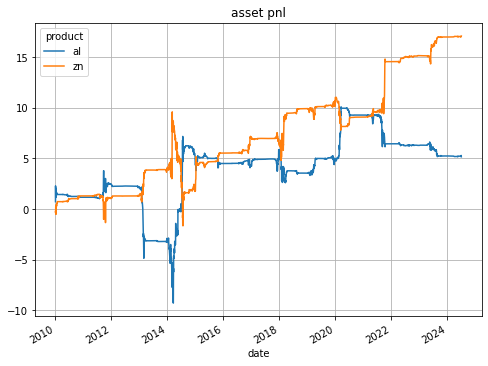

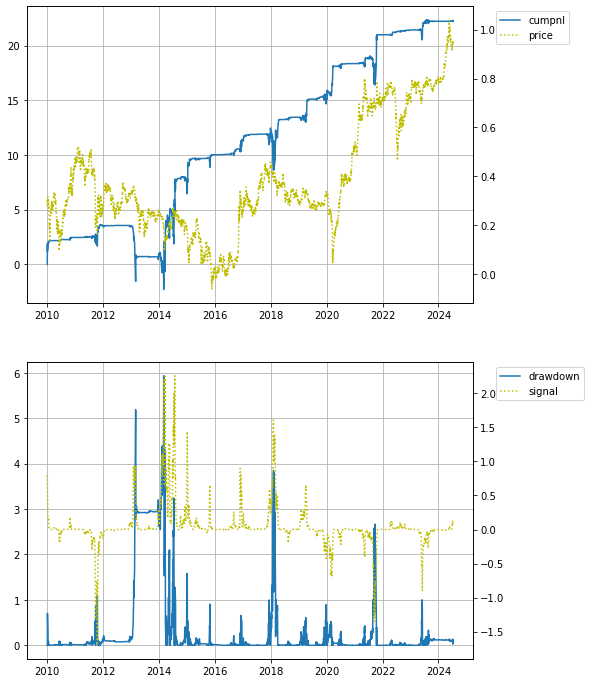

ni ss                   ni        ss
date                          
2008-01-02       NaN       NaN
2008-01-03       NaN       NaN
2008-01-04       NaN       NaN
2008-01-07       NaN       NaN
2008-01-08       NaN       NaN
...              ...       ...
2024-07-04  0.000292 -0.000292
2024-07-05  0.000275 -0.000275
2024-07-08  0.000186 -0.000186
2024-07-09  0.000098 -0.000098
2024-07-10  0.000619 -0.000619

[4014 rows x 2 columns]
sharpe        0.518825
sharpe_6m     1.540785
sharpe_1y     1.149101
sharpe_2y     0.936864
sharpe_3y     0.822988
sharpe_4y     0.791524
sharpe_5y     0.707778
sharpe_6y     0.646000
sharpe_7y     0.597655
sharpe_8y     0.559188
sharpe_9y     0.527065
sharpe_10y    0.518825
Name: total, dtype: float64
product           ni        ss
sharpe      0.377402  0.277838
sharpe_6m   1.381830 -0.402617
sharpe_1y   0.411138  0.483125
sharpe_2y   0.380636  0.348064
sharpe_3y   0.603175  0.338745
sharpe_4y   0.575441  0.303399
sharpe_5y   0.514621  0.277838
sharpe_6y   0.

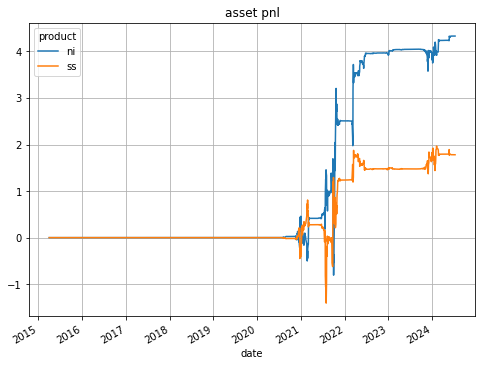

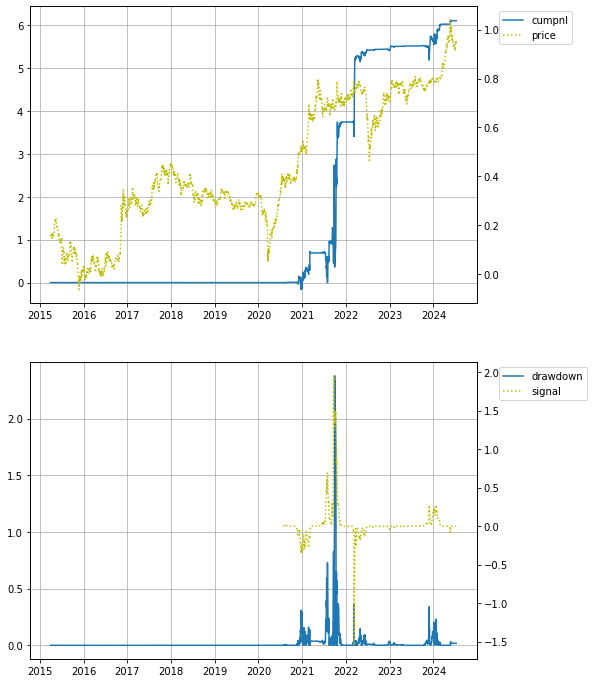

rb hc                   rb        hc
date                          
2008-01-02       NaN       NaN
2008-01-03       NaN       NaN
2008-01-04       NaN       NaN
2008-01-07       NaN       NaN
2008-01-08       NaN       NaN
...              ...       ...
2024-07-04  0.272350 -0.272350
2024-07-05  0.360453 -0.360453
2024-07-08  0.401806 -0.401806
2024-07-09  0.375421 -0.375421
2024-07-10  0.413969 -0.413969

[4014 rows x 2 columns]
sharpe        0.423082
sharpe_6m    -0.296655
sharpe_1y     0.457754
sharpe_2y     0.397751
sharpe_3y     0.367442
sharpe_4y     0.332070
sharpe_5y     0.304353
sharpe_6y     0.360322
sharpe_7y     0.353749
sharpe_8y     0.414132
sharpe_9y     0.536780
sharpe_10y    0.509232
Name: total, dtype: float64
product           rb        hc
sharpe      0.900756 -0.801846
sharpe_6m   0.342495 -0.457064
sharpe_1y  -0.164369  0.353121
sharpe_2y  -0.048381  0.200727
sharpe_3y  -0.030807  0.169969
sharpe_4y   1.011094 -0.839824
sharpe_5y   0.906578 -0.749983
sharpe_6y   0.

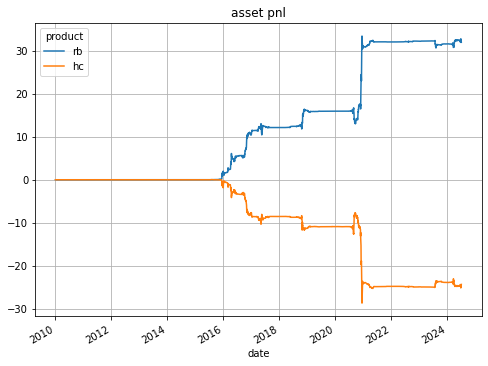

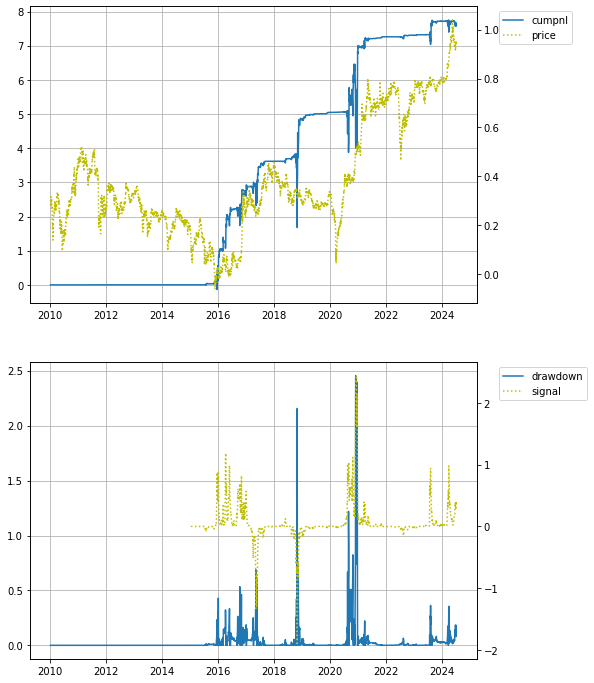

SM SF                   SM        SF
date                          
2008-01-02       NaN       NaN
2008-01-03       NaN       NaN
2008-01-04       NaN       NaN
2008-01-07       NaN       NaN
2008-01-08       NaN       NaN
...              ...       ...
2024-07-04 -0.027717  0.027717
2024-07-05 -0.037616  0.037616
2024-07-08 -0.036367  0.036367
2024-07-09 -0.032246  0.032246
2024-07-10 -0.020243  0.020243

[4014 rows x 2 columns]
sharpe        0.257526
sharpe_6m     0.606422
sharpe_1y     0.450147
sharpe_2y     0.323305
sharpe_3y     0.270060
sharpe_4y     0.258183
sharpe_5y     0.284406
sharpe_6y     0.281800
sharpe_7y     0.266593
sharpe_8y     0.257526
sharpe_9y     0.257526
sharpe_10y    0.257526
Name: total, dtype: float64
product           SM        SF
sharpe      0.144158  0.156760
sharpe_6m  -0.848321  1.357265
sharpe_1y  -0.607910  0.988667
sharpe_2y  -0.424327  0.699675
sharpe_3y   0.049603  0.247299
sharpe_4y   0.047092  0.236499
sharpe_5y   0.095629  0.224462
sharpe_6y   0.

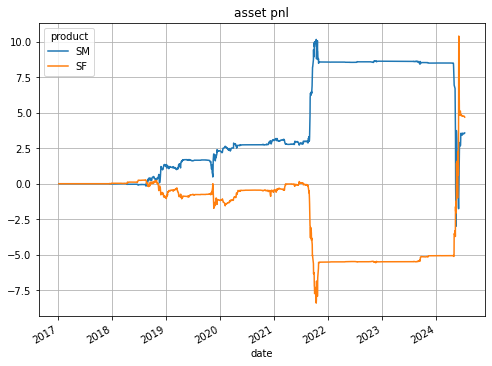

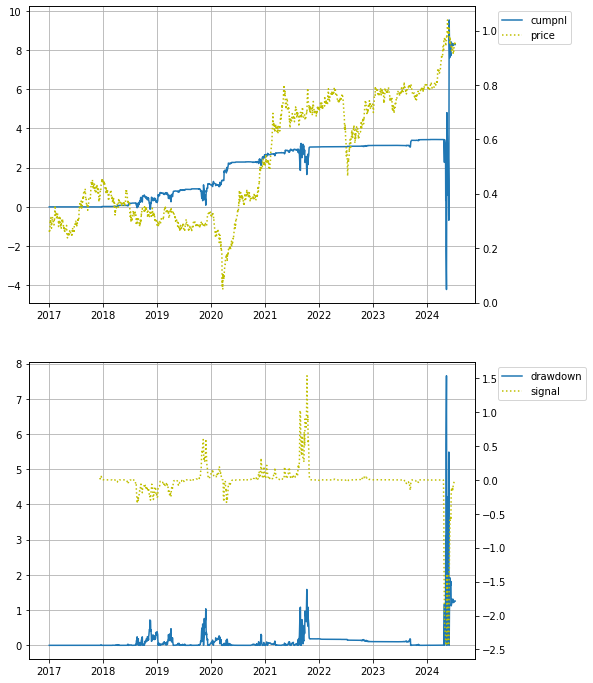

FG v                   FG         v
date                          
2008-01-02       NaN       NaN
2008-01-03       NaN       NaN
2008-01-04       NaN       NaN
2008-01-07       NaN       NaN
2008-01-08       NaN       NaN
...              ...       ...
2024-07-04  0.000025 -0.000025
2024-07-05  0.000185 -0.000185
2024-07-08  0.000521 -0.000521
2024-07-09  0.000631 -0.000631
2024-07-10  0.001320 -0.001320

[4014 rows x 2 columns]
sharpe        0.613706
sharpe_6m     2.238957
sharpe_1y     0.151112
sharpe_2y     0.083979
sharpe_3y     0.333152
sharpe_4y     0.515272
sharpe_5y     0.773503
sharpe_6y     0.728450
sharpe_7y     0.694141
sharpe_8y     0.688904
sharpe_9y     0.703249
sharpe_10y    0.797055
Name: total, dtype: float64
product           FG         v
sharpe      0.364658  0.455882
sharpe_6m   1.774438  0.314522
sharpe_1y   0.349289 -0.219808
sharpe_2y   0.345030 -0.318303
sharpe_3y   0.204678  0.211166
sharpe_4y   0.220551  0.398903
sharpe_5y   0.363559  0.597684
sharpe_6y   0.3

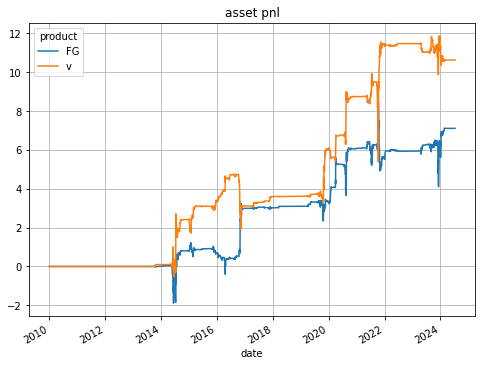

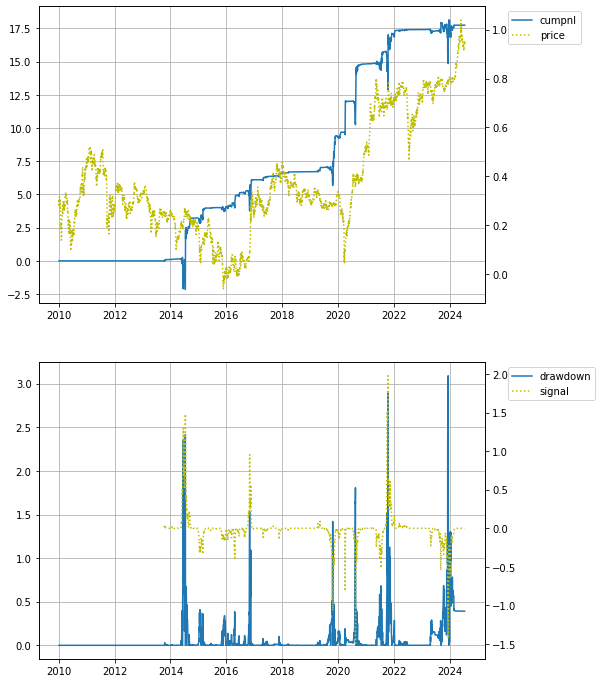

y OI                    y        OI
date                          
2008-01-02       NaN       NaN
2008-01-03       NaN       NaN
2008-01-04       NaN       NaN
2008-01-07       NaN       NaN
2008-01-08       NaN       NaN
...              ...       ...
2024-07-04 -0.006540  0.006540
2024-07-05 -0.003609  0.003609
2024-07-08 -0.001832  0.001832
2024-07-09 -0.000994  0.000994
2024-07-10 -0.000829  0.000829

[4014 rows x 2 columns]
sharpe        0.168984
sharpe_6m     1.560283
sharpe_1y     0.803711
sharpe_2y     0.927438
sharpe_3y     1.344592
sharpe_4y    -0.023582
sharpe_5y    -0.027490
sharpe_6y     0.024821
sharpe_7y     0.020802
sharpe_8y     0.024265
sharpe_9y     0.067902
sharpe_10y    0.192340
Name: total, dtype: float64
product            y        OI
sharpe      0.156540 -0.023717
sharpe_6m   0.026803  1.073897
sharpe_1y   0.467982 -0.002442
sharpe_2y   0.441930  0.106420
sharpe_3y  -0.101862  0.933400
sharpe_4y   0.764955 -0.632299
sharpe_5y   0.814858 -0.689407
sharpe_6y   0.3

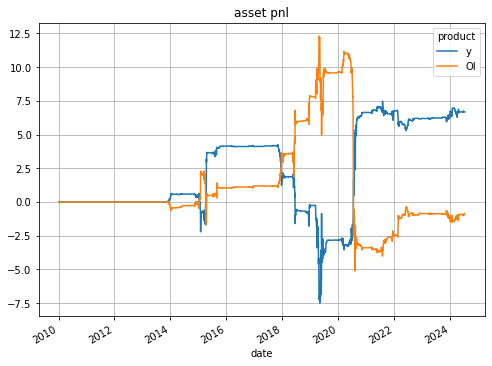

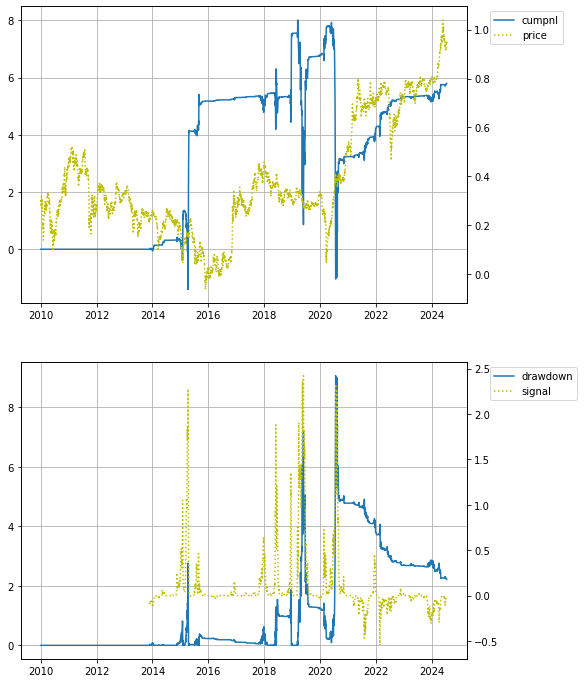

m RM                    m        RM
date                          
2008-01-02       NaN       NaN
2008-01-03       NaN       NaN
2008-01-04       NaN       NaN
2008-01-07       NaN       NaN
2008-01-08       NaN       NaN
...              ...       ...
2024-07-04 -0.052799  0.052799
2024-07-05 -0.051708  0.051708
2024-07-08 -0.041494  0.041494
2024-07-09 -0.054877  0.054877
2024-07-10 -0.072353  0.072353

[4014 rows x 2 columns]
sharpe        0.662937
sharpe_6m     1.158677
sharpe_1y     2.029191
sharpe_2y     0.651529
sharpe_3y     0.930832
sharpe_4y     0.920755
sharpe_5y     0.879099
sharpe_6y     0.820712
sharpe_7y     0.810541
sharpe_8y     0.759764
sharpe_9y     0.840266
sharpe_10y    0.768041
Name: total, dtype: float64
product            m        RM
sharpe     -0.204292  0.653699
sharpe_6m   0.696740  0.153166
sharpe_1y   1.653936  0.035140
sharpe_2y  -0.203085  0.630505
sharpe_3y   0.306168  0.237430
sharpe_4y   0.152495  0.387924
sharpe_5y   0.123533  0.392958
sharpe_6y  -0.0

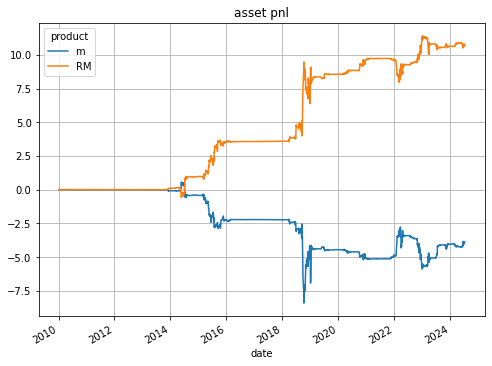

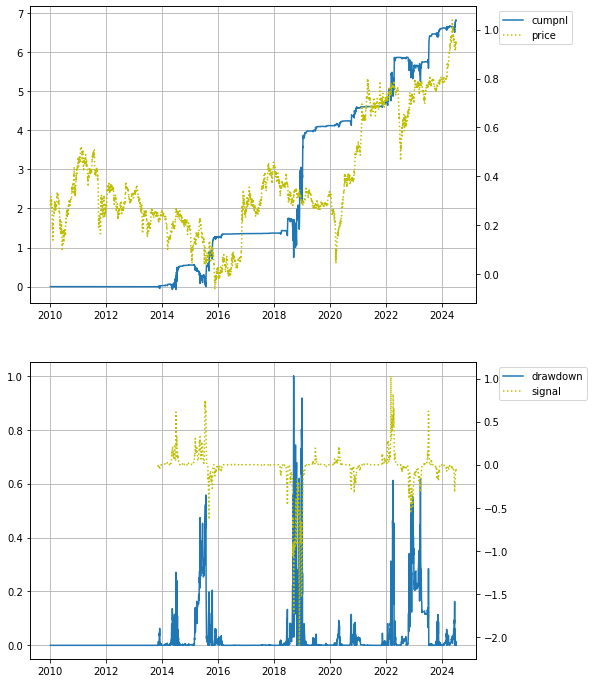

l MA                    l        MA
date                          
2008-01-02       NaN       NaN
2008-01-03       NaN       NaN
2008-01-04       NaN       NaN
2008-01-07       NaN       NaN
2008-01-08       NaN       NaN
...              ...       ...
2024-07-04  0.000051 -0.000051
2024-07-05  0.000053 -0.000053
2024-07-08  0.000047 -0.000047
2024-07-09  0.000576 -0.000576
2024-07-10  0.000999 -0.000999

[4014 rows x 2 columns]
sharpe        0.528875
sharpe_6m     1.608618
sharpe_1y     0.849872
sharpe_2y    -0.340594
sharpe_3y    -0.162191
sharpe_4y     0.217926
sharpe_5y     0.220191
sharpe_6y     0.386430
sharpe_7y     0.351382
sharpe_8y     0.430227
sharpe_9y     0.435750
sharpe_10y    0.481037
Name: total, dtype: float64
product            l        MA
sharpe     -0.335687  0.903649
sharpe_6m   0.179224  0.971539
sharpe_1y  -1.199738  1.365775
sharpe_2y  -0.845341  0.677208
sharpe_3y  -0.759028  0.713380
sharpe_4y  -0.577480  0.839440
sharpe_5y  -0.517586  0.779050
sharpe_6y  -0.3

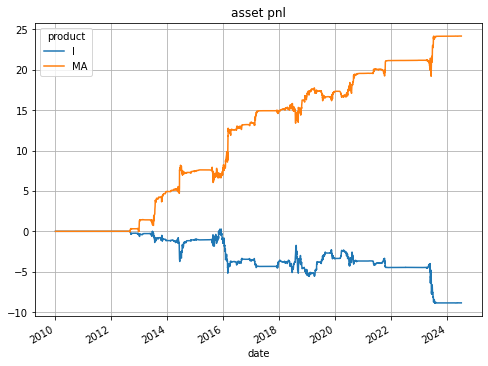

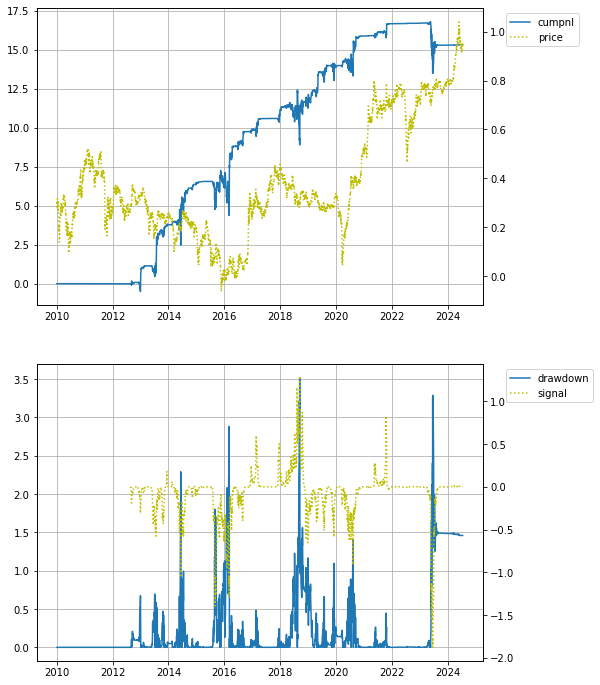

pp MA                   pp        MA
date                          
2008-01-02       NaN       NaN
2008-01-03       NaN       NaN
2008-01-04       NaN       NaN
2008-01-07       NaN       NaN
2008-01-08       NaN       NaN
...              ...       ...
2024-07-04  0.000504 -0.000504
2024-07-05  0.000485 -0.000485
2024-07-08  0.000327 -0.000327
2024-07-09  0.000945 -0.000945
2024-07-10  0.001503 -0.001503

[4014 rows x 2 columns]
sharpe        0.258368
sharpe_6m     2.289796
sharpe_1y     1.628987
sharpe_2y     0.220340
sharpe_3y     0.238965
sharpe_4y     0.479147
sharpe_5y     0.201016
sharpe_6y     0.201878
sharpe_7y     0.201312
sharpe_8y     0.347636
sharpe_9y     0.304773
sharpe_10y    0.290791
Name: total, dtype: float64
product           pp        MA
sharpe      0.016444  0.272988
sharpe_6m   1.329557 -0.061458
sharpe_1y   0.322254  0.795149
sharpe_2y  -0.408918  0.743825
sharpe_3y  -0.621554  0.725887
sharpe_4y  -0.493262  0.963394
sharpe_5y  -0.029298  0.257905
sharpe_6y  -0.

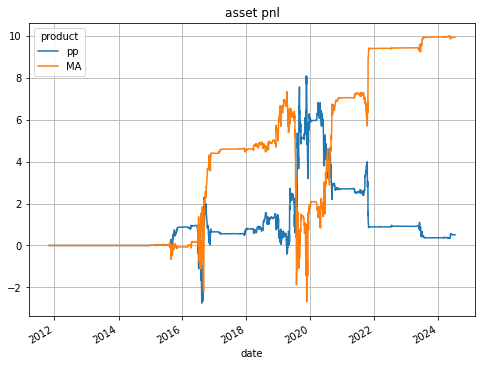

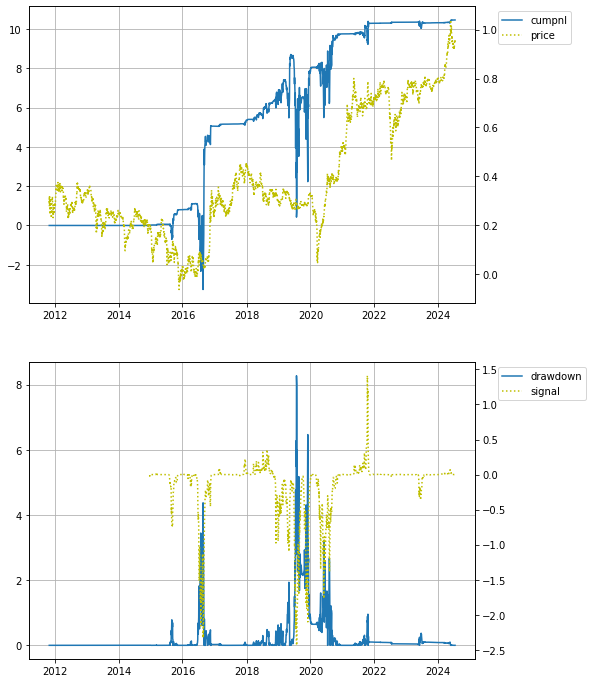

TA eg                   TA        eg
date                          
2008-01-02       NaN       NaN
2008-01-03       NaN       NaN
2008-01-04       NaN       NaN
2008-01-07       NaN       NaN
2008-01-08       NaN       NaN
...              ...       ...
2024-07-04  0.001697 -0.001697
2024-07-05  0.002672 -0.002672
2024-07-08  0.005450 -0.005450
2024-07-09  0.010264 -0.010264
2024-07-10  0.014307 -0.014307

[4014 rows x 2 columns]
sharpe        0.201236
sharpe_6m     2.129915
sharpe_1y     0.529037
sharpe_2y     0.854228
sharpe_3y     0.262278
sharpe_4y     0.291508
sharpe_5y     0.342819
sharpe_6y     0.312937
sharpe_7y     0.289545
sharpe_8y     0.270928
sharpe_9y     0.255378
sharpe_10y    0.242181
Name: total, dtype: float64
product           TA        eg
sharpe     -0.045212  0.367165
sharpe_6m   1.944770  0.640468
sharpe_1y   0.142886  0.377698
sharpe_2y   0.519893  0.249108
sharpe_3y   0.400866 -0.140669
sharpe_4y   0.356641 -0.072447
sharpe_5y  -0.077000  0.387468
sharpe_6y  -0.

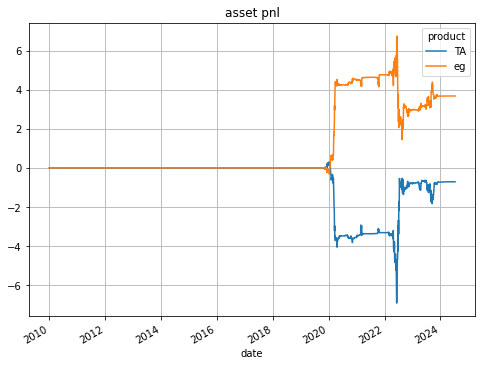

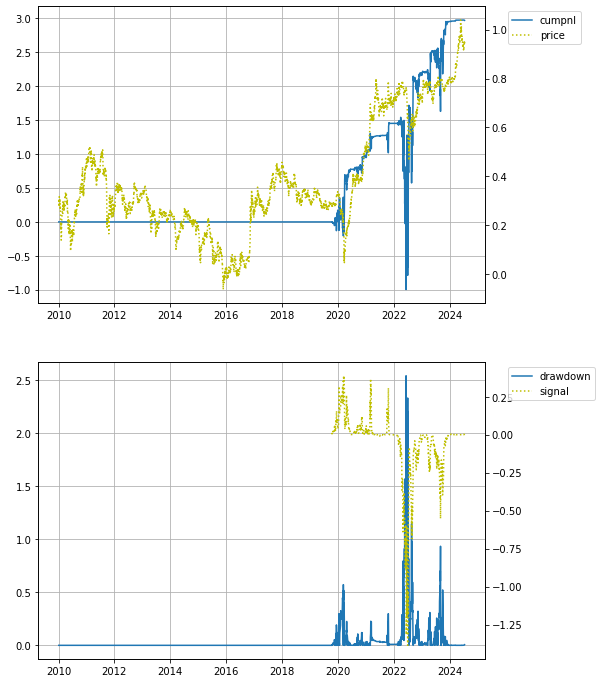

       sharpe   std  sortino
tenor                       
all      1.21  0.04     1.74
6m       0.95  0.08     1.39
1y       0.95  0.06     1.38
2y       0.63  0.05     0.83
3y       0.95  0.05     1.37
4y       1.01  0.05     1.42
5y       1.07  0.05     1.49
6y       1.12  0.05     1.59
7y       1.08  0.05     1.51
8y       1.28  0.05     1.84
9y       1.30  0.04     1.88
10y      1.40  0.04     2.04
product           cu        al        zn  pb        ss        ni        rb  \
sharpe      0.625816 -0.037116  0.318237 NaN  0.277838  0.377319  0.900756   
sharpe_6m   0.627199 -0.009291  3.023222 NaN -0.402617  1.381830  0.342495   
sharpe_1y  -0.870583 -0.366808  1.392726 NaN  0.483125  0.411138 -0.164369   
sharpe_2y  -0.671419 -0.143608  0.905334 NaN  0.348064  0.380636 -0.048381   
sharpe_3y  -0.059478 -0.445834  1.108980 NaN  0.338745  0.603175 -0.030807   
sharpe_4y  -0.028922 -0.408540  1.045652 NaN  0.303399  0.575441  1.011094   
sharpe_5y   0.060463 -0.034357  0.822339 NaN  0.

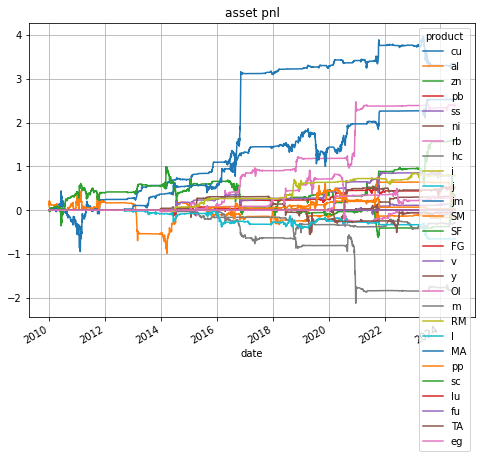

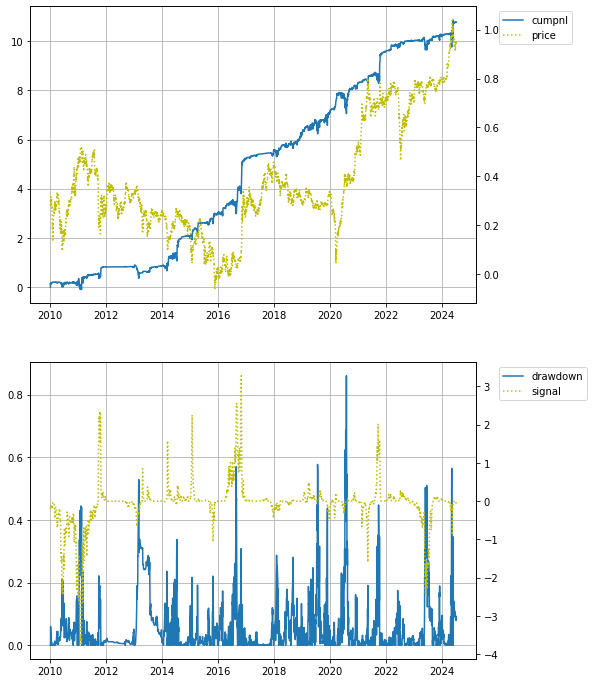

In [35]:
pair_list = [
    ('cu', 'zn'), ('cu', 'al'), ('al', 'zn'), ('ni', 'ss'), #('zn', 'hc'), 
    ('rb', 'hc'), ('SM', 'SF'), ('FG', 'v'), # ('j', 'jm'),  ('i', 'j'), 
    ('y', 'OI'), ('m', 'RM'), #('PF', 'TA'), ('PF', 'eg'),
    #('CF', 'PF'), ('c', 'cs'), #('nr', 'ru'), 
    ('l', 'MA'), ('pp', 'MA'), ('TA', 'eg'), # ('TA', 'MA'), #('lu', 'fu'), ('lu', 'sc'), ('fu', 'sc'),
]
vol_win = 20
empiric_assets = [
    'cu', 'al', 'zn', 'pb', 'ss', 'ni',
    'rb', 'hc', 'i', 'j', 'jm', 'SM', 'SF', 'FG', 'v',
    'y', 'OI', 'm', 'RM', 
    #'CF', 'PF', 'c', 'cs',     
    'l', 'MA', 'pp', 'sc', 'lu', 'fu', 'TA', 'eg', #'PF'
]

vol_df = get_asset_vols(df, empiric_assets, vol_win=vol_win, vol_type='pct_chg')
df_pxchg = df.loc[:, df.columns.get_level_values(0).isin(empiric_assets) 
                   & (df.columns.get_level_values(1)=='c1') 
                   & (df.columns.get_level_values(2)=='close')
                  ].droplevel([1, 2], axis=1).dropna(how='all').pct_change()


cutoff='2010-01-01'
signal_cap = None
signal_func = 'zscore_adj'

param_rng = [200, 250, 5]
bullish = False
vol_win = 120
signal_df = pd.DataFrame(0, index=df_pxchg.index, columns=empiric_assets)
for (asset_a, asset_b) in pair_list:
    pair_assets = [asset_a, asset_b]
    sig_df = pd.DataFrame(index=df_pxchg.index, columns=pair_assets)    
    feature_ts = np.log(df[(asset_a, 'c1', 'close')]) - np.log(df[(asset_b, 'c1', 'close')])
    sig_ts = calc_conv_signal(feature_ts, signal_func=signal_func, param_rng=param_rng, signal_cap=signal_cap, vol_win=vol_win)
    sig_ts = sig_ts.apply(lambda x: np.sign(x) * min(abs(x), 1.25)**4).ewm(1).mean()
    #sig_ts = signal_hysteresis(sig_ts, 1.5, 0.5)
    if not bullish:
        sig_ts = -sig_ts
    sig_df[asset_a] = sig_ts
    sig_df[asset_b] = -sig_ts        
    print(asset_a, asset_b, sig_df)
    signal_df = signal_df + sig_df.reindex_like(signal_df).fillna(0)
    holding = generate_holding_from_signal(sig_df[pair_assets], vol_df[pair_assets], risk_scaling=1.0, asset_scaling=False)
    bt_metrics = MetricsBase(holdings=holding[pair_assets][cutoff:],
                             returns=df_pxchg[pair_assets][cutoff:], shift_holdings=1)

    pnl_stats = bt_metrics.calculate_pnl_stats(shift=0, use_log_returns=False, tenors=pnl_tenors)
    print(pnl_stats['sharpe'])
    print(pnl_stats['asset_sharpe_stats'])

    print(pd.DataFrame({key: pnl_stats[key] for key in ['pnl_per_trade', 'turnover']}))

    pnl_stats['asset_cumpnl'].plot(figsize=(8,6))
    plt.grid()
    plt.title('asset pnl')

    plot_signal_pnl(pnl_stats['portfolio_cumpnl'], signal=sig_ts, asset_price=df_pxchg[empiric_assets[0]].cumsum(), figsize=(8, 12))

holding = generate_holding_from_signal(signal_df[empiric_assets], vol_df[empiric_assets], risk_scaling=1.0, asset_scaling=False)
bt_metrics = MetricsBase(holdings=holding[empiric_assets][cutoff:],
                         returns=df_pxchg[empiric_assets][cutoff:], shift_holdings=1)

pnl_stats = bt_metrics.calculate_pnl_stats(shift=0, use_log_returns=False, tenors=pnl_tenors, perf_metrics=['sharpe', 'std', 'sortino', 'calmar'])

#print(pnl_stats['sharpe'])
perf_stats = transform_output(pnl_stats)
print(perf_stats.round(2))

print(pnl_stats['asset_sharpe_stats'])

print(pd.DataFrame({key: pnl_stats[key] for key in ['pnl_per_trade', 'turnover']}))

pnl_stats['asset_cumpnl'].plot(figsize=(8,6))
plt.grid()
plt.title('asset pnl')
plot_signal_pnl(pnl_stats['portfolio_cumpnl'], signal=signal_df.iloc[:, 0], asset_price=df_pxchg[empiric_assets[0]].cumsum(), figsize=(8, 12))

In [7]:
from pycmqlib3.utility.exch_ctd_func import *
spot_df['io_ctd_spot'] = io_ctd_basis(spot_df, df[('i', 'c1', 'expiry')])

spot_data_map = {
    "cu": "cu_smm1_spot",
    "al": "al_smm0_spot",
    "zn": "zn_smm0_spot",
    "pb": "pb_smm1_spot",
    "sn": "sn_smm1_spot",
    "ni": "ni_smm1_spot", #"ni_smm1_jc_spot", #
    "ss": "ss_304_gross_wuxi",
    "ao": "alumina_spot_qd",
    "si": "si_553_spot_smm",
    "rb": "rebar_sh",
    "hc": "hrc_sh",
    "i": "io_ctd_spot",
    "j": "coke_sh_xb",
    "jm": "ckc_a10v24s08_lvliang",
    "FG": "fg_5mm_shahe",
    "SM": "sm_65s17_neimeng",
    "SF": "sf_72_ningxia",
    "v": "pvc_cac2_east",
    "SA": "sa_heavy_east",
    "au": "au_td_sge",
    "ag": "ag_td_sgx",
}

asset_list = df.columns.get_level_values(0).unique()
spot_df['date'] = pd.to_datetime(spot_df.index)
px_field = 'close'
for asset in asset_list:
    spot_df[f'{asset}_c1'] = df[(asset, 'c1', px_field)]/np.exp(df[(asset, 'c1', 'shift')])
    spot_df[f'{asset}_expiry'] = pd.to_datetime(df[(asset, 'c1', 'expiry')])
    spot_df[f'{asset}_ryield'] = (np.log(df[(asset, 'c1', px_field)]/np.exp(df[(asset, 'c1', 'shift')])) - 
                                  np.log(df[(asset, 'c2', px_field)]/np.exp(df[(asset, 'c2', 'shift')])))/(df[(asset, 'c2', 'expiry')]-df[(asset, 'c1', 'expiry')]).dt.days*365
    spot_df[f'{asset}_basmom'] = np.log(df[(asset, 'c1', px_field)].pct_change() + 1) - np.log(df[(asset, 'c2', px_field)].pct_change() + 1)
    for win in [5, 10, 20, 40, 60, 120]:
        spot_df[f'{asset}_basmom{win}'] = spot_df[f'{asset}_basmom'].dropna().rolling(win).sum()
    
    if asset in spot_data_map:
        spot_df[f'{asset}_phybasis'] = (np.log(spot_df[spot_data_map[asset]]) - np.log(spot_df[f'{asset}_c1']))/(spot_df[f'{asset}_expiry'] - spot_df['date']).dt.days*365
        
spot_df.loc[:'2017-01-01', 'i_phybasis'] = np.nan


In [8]:
spot_df['cu_base_phybas'] = spot_df['cu_smm_phybasis']
spot_df['al_base_phybas'] = spot_df['al_smm0_phybasis']
spot_df['zn_base_phybas'] = spot_df['zn_smm0_sh_phybasis']
spot_df['pb_base_phybas'] = spot_df['pb_smm1_sh_phybasis']
spot_df['ni_base_phybas'] = spot_df['ni_smm1_jc_phybasis']
spot_df['sn_base_phybas'] = spot_df['sn_smm1_sh_phybasis']
spot_df['ss_base_phybas'] = spot_df["ss_304_wuxi_phybasis"]
spot_df['cu_base_tc'] = spot_df['cu_mine_tc']
spot_df['zn_base_tc'] = spot_df['zn_50conc_tc_henan']
spot_df['pb_base_tc'] = spot_df['pb_50conc_tc_neimeng']
spot_df['sn_base_tc'] = spot_df['sn_40conc_tc_yunnan']

metal_inv_map = {
    'cu': 'cu_inv_social_all',
    'al': 'al_inv_social_all',
    'zn': 'zn_inv_social_3p',
    'ni': 'ni_inv_social_6p',
    'pb': 'pb_inv_social_5p',
    'sn': 'sn_inv_social_all',
    'si': 'si_inv_social_all',
    'ao': 'bauxite_inv_az_ports',
    'ss': "ss_inv_social_300",
    'rb': 'rebar_inv_social',
    'hc': 'hrc_inv_social',
    'j': "coke_inv_ports_tj",
    'jm': "ckc_inv_cokery",
    'v': "v_inv_social",
    'i': 'io_inv_45ports',
    'SM': 'sm_inv_mill',
    'SF': 'sf_inv_mill',
    'FG': "fg_inv_mill",
    'SA': 'sa_inv_mill_all',
}
for asset in metal_inv_map:
    spot_df[f'{asset}_sinv'] = spot_df[metal_inv_map[asset]]

In [9]:
asset_pairs = [
    ("sw_sector_idx_prop", 'csi500_idx', 'prop_sw_csi500'),
    ("sw_sector_idx_const", 'csi500_idx', 'const_sw_csi500'),
    ("sw_sector_idx_steel", 'csi500_idx', 'steel_sw_csi500'),
    ("sw_sector_idx_basemetal", 'csi500_idx', 'base_sw_csi500'),
    ("zx_sector_idx_prop", 'csi500_idx', 'prop_zx_csi500'),
    ("zx_sector_idx_const", 'csi500_idx', 'const_zx_csi500'),
    ("zx_sector_idx_steel", 'csi500_idx', 'steel_zx_csi500'),
    ("zx_sector_idx_basemetal", 'csi500_idx', 'base_zx_csi500'),
]

beta_win = 245
for trade_asset, index_asset, key in asset_pairs:
    asset_df = spot_df[[index_asset, trade_asset]].dropna().copy(deep=True)
    for asset in asset_df:
        asset_df[f"{asset}_pct"] = asset_df[asset].pct_change().rolling(5).mean()
    asset_df['beta'] = asset_df[f"{index_asset}_pct"].rolling(beta_win).cov(asset_df[f"{trade_asset}_pct"])/asset_df[f"{index_asset}_pct"].rolling(beta_win).var()
    asset_df['ret'] = asset_df[trade_asset].pct_change() - asset_df['beta'] * asset_df[index_asset].pct_change().fillna(0)
    spot_df[key + "_ret"] = asset_df['ret'].dropna()
    spot_df[key + '_beta'] = asset_df['beta']
    spot_df[key + '_val'] = asset_df['ret'].dropna().cumsum()


In [53]:
spot_df['cgb_3m_2y_spd'] = spot_df['shibor_1m'] - spot_df['cn_govbond_yield_2y']

<AxesSubplot:>

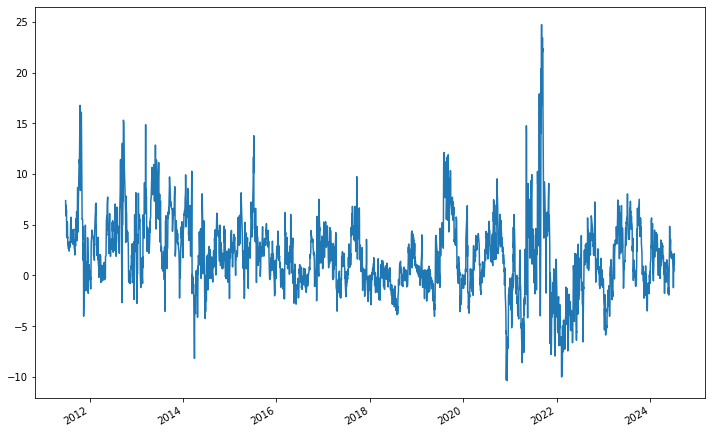

In [10]:
spot_df['io_on_off_arb'] = vat_adj(spot_df['pbf_cfd']-25)/spot_df['usdcnh_spot']/0.915/61.5*62-spot_df['plt62']
spot_df['io_on_off_arb'].dropna().plot()

# feature study

In [54]:
vol_win = 20

empiric_assets = [
    'rb', 'hc', 'i',
    #'j', #'jm', 
    #'v', 'FG', #'SM', 'SF',
#    'i', 'rb', 'hc', #'FG', 'v', 'j', 'jm' , #'SA',##
# # #     #'SM', 'SF',
    'cu', 'al',  'zn', #'pb', 'sn', 'ao', 'si','ss', 
    #'l', 'pp', 'TA', 'sc', 'eb', 'eg', 'UR', 'lu', 'ru',  
    #'m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', 'AP', 'lh',
#     'rb_i', 'hc_i'
]


df_pxchg = pd.DataFrame(index=df.index, columns=empiric_assets)
vol_df = pd.DataFrame(index=df.index, columns=empiric_assets)
for asset in empiric_assets:
    if '_' in asset:
        df_pxchg[asset] = beta_ret_dict[asset].dropna()
    else:
        df_pxchg[asset] = df[(asset, 'c1', 'close')].pct_change()
    vol_df[asset] = df_pxchg[asset].dropna().rolling(vol_win).std()

customerized signal

sharpe        0.833863
sharpe_6m     1.356200
sharpe_1y     1.125807
sharpe_2y     0.177829
sharpe_3y     0.743524
sharpe_4y     1.232851
sharpe_5y     1.208329
sharpe_6y     1.107339
sharpe_7y     1.128688
sharpe_8y     1.259295
sharpe_9y     1.098686
sharpe_10y    1.008824
Name: total, dtype: float64
                  rb        hc         i        cu        al        zn
sharpe      0.478210  0.772488  0.917644  0.496318  0.739848  0.609826
sharpe_6m   1.835648  1.663122  2.421553 -0.661603 -0.383890  1.125665
sharpe_1y   1.199208  0.967436  1.818624 -0.680326  0.565461  1.189999
sharpe_2y   0.586238  0.353665  0.486896 -0.782937 -0.039656  0.247213
sharpe_3y   0.813951  0.521965  0.609314  0.101504  0.377884  0.839912
sharpe_4y   1.240245  1.069331  0.971115  0.537798  0.747875  0.956675
sharpe_5y   1.083802  0.984591  1.081692  0.761776  0.699102  0.875318
sharpe_6y   1.017520  0.949511  1.327707  0.588420  0.402899  0.698206
sharpe_7y   0.968805  0.853669  1.372231  0.698174  0.430

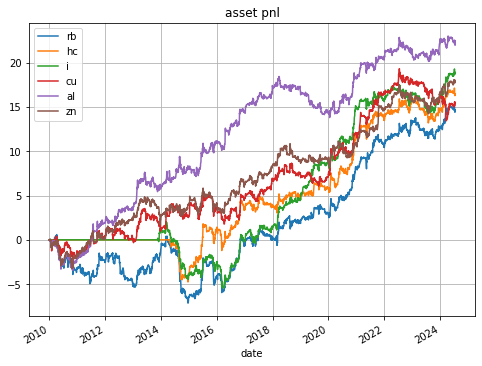

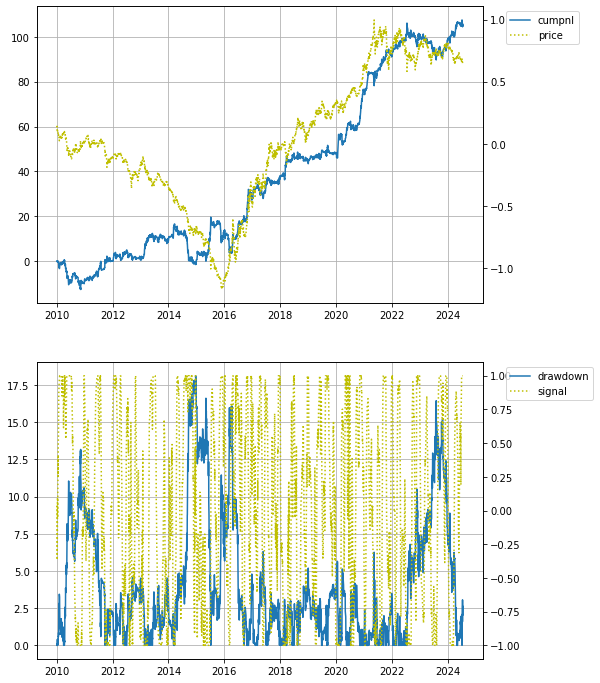

In [87]:
cutoff='2010-01-01'

signal_cap = [-2, 2]
signal_func = 'hlratio'

bullish = True
#freq='W-Fri'
param_rng=[20, 80, 2]
signal_df = pd.DataFrame(index=df_pxchg.index)
feature='cgb_1_2_spd'
        
for asset in empiric_assets:
    #feature = f"{asset}_lme_base_ts"
#     if asset in ['cu', 'zn', 'al']: #    
#         #param_rng = [1, 5]
#         feature = f"{asset}_lme_3m_15m_spd"
#     else:
#         feature = f"{asset}_lme_0m_3m_spd"
    feature_ts = spot_df[feature].reindex(index=cdates).ffill().reindex(index=bdates)
    feature_ts = feature_ts.ewm(5).mean()
    signal_ts = calc_conv_signal(feature_ts, signal_func=signal_func, param_rng=param_rng, signal_cap=signal_cap, vol_win=120)
    #signal_ts = signal_hump(signal_ts, 0.5)
    if not bullish:
        signal_ts = -signal_ts

    signal_df[asset] = signal_ts.reindex(index=cdates).ffill().reindex(index=df_pxchg.index).ffill()
#signal_df = signal_df.ewm(1).mean()    
#signal_df = xs_demean(signal_df)

holding = generate_holding_from_signal(signal_df, vol_df, risk_scaling=1.0, asset_scaling=False)
bt_metrics = MetricsBase(holdings=holding[empiric_assets][cutoff:],
                         returns=df_pxchg[empiric_assets][cutoff:], shift_holdings=1)

pnl_stats = bt_metrics.calculate_pnl_stats(shift=0, use_log_returns=False, tenors=pnl_tenors)

print(pnl_stats['sharpe'])
print(pnl_stats['asset_sharpe_stats'])

print(pd.DataFrame({key: pnl_stats[key] for key in ['pnl_per_trade', 'turnover']}))

pnl_stats['asset_cumpnl'].plot(figsize=(8,6))
plt.grid()
plt.title('asset pnl')

plot_signal_pnl(pnl_stats['portfolio_cumpnl'], signal=signal_ts, asset_price=df_pxchg[empiric_assets[0]].cumsum(), figsize=(8, 12))


In [30]:
signal_df

cu        al        ni        zn
date                                              
2008-01-02       NaN       NaN       NaN       NaN
2008-01-03       NaN       NaN       NaN       NaN
2008-01-04       NaN       NaN       NaN       NaN
2008-01-07       NaN       NaN       NaN       NaN
2008-01-08       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...
2024-07-01 -1.226895  1.833859 -0.363701 -0.243263
2024-07-02 -1.194514  1.811989 -0.369353 -0.248122
2024-07-03 -1.141521  1.783380 -0.382017 -0.259842
2024-07-04 -1.132243  1.769473 -0.380256 -0.256975
2024-07-05 -1.017130  1.720419 -0.413925 -0.289363

[4011 rows x 4 columns]

sharpe        0.967413
sharpe_6m     0.706088
sharpe_1y     0.167833
sharpe_2y     0.010729
sharpe_3y     0.566793
sharpe_4y     0.939295
sharpe_5y     1.006343
sharpe_6y     0.998257
sharpe_7y     0.893100
sharpe_8y     0.932540
sharpe_9y     1.123003
sharpe_10y    1.079067
Name: total, dtype: float64
                   i        rb        hc
sharpe      1.031534  0.855597  0.998977
sharpe_6m   0.184851  1.218563  0.859481
sharpe_1y  -0.488850  0.661726  0.300109
sharpe_2y  -0.303840  0.288883  0.038479
sharpe_3y   0.589308  0.480239  0.526450
sharpe_4y   1.007020  0.731213  0.873889
sharpe_5y   1.032583  0.830581  0.877733
sharpe_6y   0.962407  0.939039  0.823718
sharpe_7y   0.784304  0.878224  0.787332
sharpe_8y   0.854941  0.908476  0.813683
sharpe_9y   1.053617  1.004998  1.054870
sharpe_10y  1.021744  0.968990  1.000418
    pnl_per_trade   turnover
i      153.950428  28.387434
rb      70.108133  31.480236
hc     105.193931  29.105210


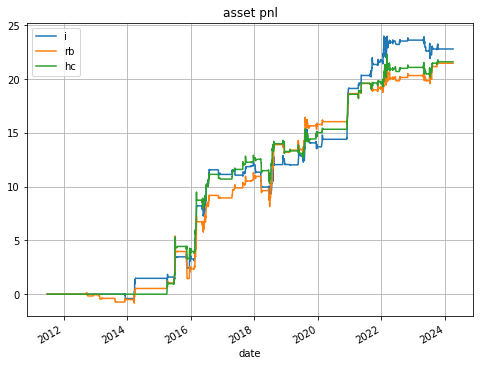

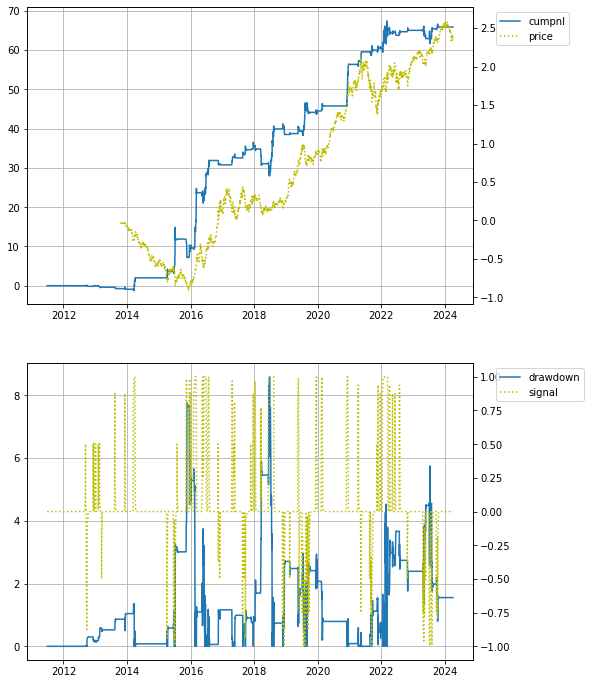

In [48]:
cutoff='2010-01-01'
feature='io_on_off_arb'
vol_win = 120
param_rng = [20, 30, 2]
signal_cap = [-2, 2]
signal_func = 'zscore'
chg_func = 'pct_change'

bullish = False
freq = 'W-Fri'

#feature_ts = spot_df[feature].reindex(index=cdates).ffill().reindex(index=bdates)
#feature_ts = spot_df[feature].ffill().reindex(index=pd.date_range(start=df.index[0], end=df.index[-1], freq=freq)).ffill().dropna()
feature_ts = spot_df[feature].dropna()
#feature_ts = feature_ts.cumsum()

#feature_ts = feature_ts.ewm(1).mean()
feature_ts = hlratio(feature_ts, 250)
#signal_ts = feature_ts.apply(lambda x: np.sign(x) if x>0.75 else 0)
signal_ts = signal_hysteresis(feature_ts, 0.75, 0.15)
#label_func = lunar_label
# label_func = calendar_label
#feature_ts = yoy_generic(feature_ts, label_func=label_func, group_col='label_day', func=chg_func)

#feature_ts = feature_ts.diff()
#signal_ts = calc_conv_signal(feature_ts, signal_func=signal_func, param_rng=param_rng, signal_cap=signal_cap, vol_win=vol_win)
# signal_ts = seasonal_score(feature_ts.to_frame(), backward=10, forward=10, rolling_years=3, min_obs=10)
# signal_ts = seasonal_score(feature_ts.to_frame(), backward=15, forward=15, rolling_years=3, min_obs=30)
# signal_ts = feature_ts

if not bullish:
    signal_ts = -signal_ts
    
signal_ts = signal_ts.reindex(index=cdates).ffill().reindex(index=df_pxchg.index).dropna()
signal_ts = signal_ts.ewm(1).mean()
#signal_ts = signal_ts.rolling(3).mean()
signal_df = pd.DataFrame(dict([(asset, signal_ts) for asset in empiric_assets]))

holding = generate_holding_from_signal(signal_df, vol_df, risk_scaling=1.0, asset_scaling=False)
bt_metrics = MetricsBase(holdings=holding[empiric_assets][cutoff:],
                         returns=df_pxchg[empiric_assets][cutoff:], shift_holdings=1)

pnl_stats = bt_metrics.calculate_pnl_stats(shift=0, use_log_returns=False, tenors=pnl_tenors)

print(pnl_stats['sharpe'])
print(pnl_stats['asset_sharpe_stats'])

print(pd.DataFrame({key: pnl_stats[key] for key in ['pnl_per_trade', 'turnover']}))

pnl_stats['asset_cumpnl'].plot(figsize=(8,6))
plt.grid()
plt.title('asset pnl')

plot_signal_pnl(pnl_stats['portfolio_cumpnl'], signal=signal_ts, asset_price=df_pxchg[empiric_assets[0]].cumsum(), figsize=(8, 12))


In [10]:
feature_setup = {
    'pbf_yoy_qtl': [['fef','i'], ["pbf_prem", 'qtl', [20, 30, 2], "cal_yoy",  "diff", True, "", "", 120]],
    'pbf_yoy_eds': [['fef','i'], ["pbf_prem", 'ema_dff_sgn', [5, 15, 1], "cal_yoy",  "diff", True, "", "", 120]],
    'pbf_spd': [['rb_i', "hc_i"], ["pbf_prem", 'zscore_adj', [40, 80, 2], "",  "diff", False, "", "", 120]],
    
    'sgx_px': [['rb', 'hc', 'j', 'jm', 'v', 'SF', 'SM'], ['sgx_c1_c2_ratio', 'qtl', [40, 60, 2], 'ema1', 'diff', False, "", "", 120]],
    'sgx_spd': [['rb_i', 'hc_i'], ['sgx_c1_c2_ratio', 'qtl', [40, 60, 2], 'ema1', 'diff', False, "", "", 120]],
    'fef_ryield_mom': [['rb', 'hc', 'j', 'jm', 'v', 'SM', 'SF'], ['fef_ryield', 'zscore', [10, 80, 2], 'ema5', '', False, "", "", 120]],
    'fef_ryield_spd_mom': [['rb_i', 'hc_i'], ['fef_ryield', 'zscore', [10, 80, 2], 'ema5', '', False, "", "", 120]],
    'fef_basmom_ema': [['rb', 'hc', 'j', 'jm', 'v', 'SM', 'SF'], ['fef_basmom10', 'ema', [5, 10, 1], '', '', False, "price", "", 120]],
    'fef_basmom_spd_ema': [['rb_i', 'hc_i'], ['fef_basmom10', 'ema', [5, 10, 1], '', '', False, "price", "", 120]],
    'fef_ryield_ema': [['rb', 'hc', 'j', 'jm', 'v', 'SF', 'SM'], ['fef_ryield', 'ema', [10, 20, 1], '', '', True, "", "", 120]],
    
    "base_etf_mom_zsa": [['cu', 'al', 'zn', 'ni', 'pb', 'sn'], ["base_sw_csi500_ret", "zscore_adj", [20, 40, 1], "csum", "", True, "", "", 120]],
    "base_etf_mom_ewm": [['cu', 'al', 'zn', 'ni', 'pb', 'sn'], ["base_sw_csi500_ret", "ewmac", [2, 4, 1], "csum", "", True, "", "", 120]],
    "const_etf_mom_zsa": [['rb', 'i', 'v', 'FG', 'j'], ["const_sw_csi500_ret", "zscore_adj", [40, 80, 2], "csum", "", True, "", "", 120]],
    "const_etf_mom_ewm": [['rb', 'i', 'v', 'FG', 'j'], ["const_sw_csi500_ret", "ewmac", [2, 5, 1], "csum", "", True, "", "", 120]],
    "prop_etf_mom_dbth_zs": [['rb', 'i', 'v', 'FG'], ["prop_sw_csi500_ret", "hysteresis", [1, 120, 0.5], "ema3", "zscore_roll", True, "", "", 120]],
    "prop_etf_mom_dbth_qtl": [['rb', 'i', 'v', 'FG'], ["prop_sw_csi500_ret", "dbl_th", [0.75, 120, 0], "ema3", "pct_score", True, "", "", 120]],
    "prop_etf_mom_dbth_qtl2": [['rb', 'i', 'v', 'FG'], ["prop_sw_csi500_ret", "dbl_th", [0.8, 240, 1], "ema3", "pct_score", True, "", "", 120]],
    'strip_hsec_zs': [['rb', 'hc', 'i', 'j', 'jm', 'v', 'FG', 'cu', 'al'], ['strip_hsec', 'zscore', [60, 100, 2], '', 'pct_change', True, '', "ema1", 120]],
    'steel_margin_lvl_fast': [['rb', 'hc', 'i', 'j'], ['margin_hrc_macf', 'qtl', [20, 30, 2], 'ema3', '', True, 'price', "", 120]],
    
    "steel_sinv_st": [['rb', 'hc', 'i'], ["steel_social_inv", "qtl", [8, 16, 1], "lunar_yoy_day", "pct_change", False, "", "", 120]],
    "steel_sinv_mt": [['rb', 'hc', 'i'], ["steel_social_inv", "qtl", [16, 24, 1], "lunar_yoy_day", "pct_change", False, "", "", 120]],
    "steel_sinv_lt": [['rb', 'hc', 'i'], ["steel_social_inv", "qtl", [24, 36, 1], "lunar_yoy_day", "pct_change", False, "", "", 120]],
    "steel_sinv_yr": [['rb', 'hc', 'i'], ["steel_social_inv", "qtl", [48, 56, 1], "lunar_yoy_day", "pct_change", False, "", "", 120]],
    'steel_sinv_lyoy_zs': [['rb', 'hc', 'i'], ['steel_inv_social', 'zscore', [24, 30, 2], 'lunar_yoy_day', 'diff', False, '', "", 120]],
    'steel_sinv_lyoy_mds': [['rb', 'hc', 'i'], ['steel_inv_social', 'ma_dff_sgn', [5, 9, 1], 'lunar_yoy_day', 'diff', False, '', "", 120]],
    
    'ioarb_px_hlr': [['rb', 'hc'], ['io_on_off_arb', 'hlratio', [40, 80, 2], 'sma2', '', False, 'price', '', 120]],
    'ioarb_px_qtl_1y': [['rb_i', 'hc_i'], ['io_on_off_arb', 'qtl', [240, 260, 2], 'sma2', '', False, 'price', '', 120]],
    'io_removal_lvl': [['rb', 'hc', 'i', 'j', 'jm', 'v', 'FG', 'cu'], ['io_removal_41ports', 'qtl', [20, 40, 2], '', '', True, 'price', 'sma2', 120]],
    'io_removal_lyoy': [['rb', 'hc', 'i', 'j', 'jm', 'v', 'FG', 'cu'], ['io_removal_41ports', 'qtl', [6, 10], 'lunar_yoy_day', 'diff', True, 'W-Fri', "", 120]],
    #'io_millinv_lvl': [['i'], ['io_inv_mill[64]', 'qtl', [20, 40, 2], '', 'pct_change', True, 'price', "", 120]],
    'io_millinv_lyoy': [['rb', 'hc', 'i', 'j', 'jm', 'FG'], ['io_inv_mill[64]', 'qtl', [2, 4, 1], 'lunar_yoy_day', 'pct_change', True, 'W-Thu', 'ema3', 120]],
    'io_invdays_lvl': [['rb', 'hc', 'i', 'j', 'jm', 'v', 'FG', 'cu', 'al'], ['io_invdays_imp_mill[64]', 'qtl', [20, 40, 2], '', 'pct_change', True, 'price', 'ema3', 120]],
    #'io_invdays_lyoy': ['io_invdays_imp_mill[64]', 'qtl', [2, 4], 'lunar_yoy_day', 'pct_change', True, 'W-Fri', "", 120], 
    'io_port_inv_lvl_slow': ['io_inv_imp_31ports_w', 'zscore', [240, 255, 5], '', 'pct_change', False, 'price', "sma1", 120],
    
    'ioarb_px_hlr': [['rb', 'hc', 'i'], ['io_on_off_arb', 'hlratio', [40, 80, 2], 'sma2', '', False, 'price', 'hmp0.1', 120]],
    'ioarb_px_hlrhys': [['rb', 'hc', 'i'], ['io_on_off_arb', 'hysteresis', [0.75, 250, 0.15], '', 'hlratio', False, 'price', 'ema1', 120]],    
    'ioarb_spd_qtl_1y': [['rb_i', 'hc_i'], ['io_on_off_arb', 'qtl', [240, 260, 2], 'sma2', '', False, 'price', 'hmp0.1', 120]],    
    
    'io_pinv31_lvl_zsa': [['rb_i', "hc_i"], ['io_inv_31ports', 'zscore_adj', [24, 36, 2], '', 'pct_change', True, "", "", 120]],
    'io_pinv45_lvl_hlr': [['rb_i', "hc_i"], ['io_inv_45ports', 'hlratio', [24, 36, 2], '', 'pct_change', True, "", "", 120]],
    
    'phycarry_ts': [['i', 'rb', 'hc', 'SM', 'SF', 'FG', 'v', 'cu', 'al', 'zn', 'ni', 'pb', 'sn', 'ss', 'ao'], 
                    ['phybasis', 'ema', [10, 20], "", "", True, "", "sma2", 120]],
    'phycarry_xscore': [['i', 'rb', 'hc', 'SM', 'SF', 'FG', 'v', 'cu', 'al', 'zn', 'ni', 'pb', 'sn', 'ss', 'ao'], 
                    ['phybasis', 'ema', [10, 20], "", "", True, "", "sma2", 120]],
    'ryield_ts': [['i', 'rb', 'hc', 'jm', 'j', 'SM', 'SF', 'FG', 'v', 'cu', 'al', 'zn', 'ni', 'pb', 'sn', 'ss'], 
                  ['ryield', 'ma', [1, 2], "", "", True, "", "sma1", 240]],
    'ryield_xscore': [['i', 'rb', 'hc', 'jm', 'j', 'SM', 'SF', 'FG', 'v', 'cu', 'al', 'zn', 'ni', 'pb', 'sn', 'ss'], 
                  ['ryield', 'ma', [1, 2], "", "", True, "", "sma5", 240]],
    'ryieldmom_xscore': [['i', 'rb', 'hc', 'jm', 'j', 'SM', 'SF', 'FG', 'v', 'cu', 'al', 'zn', 'ni', 'pb', 'sn', 'ss'], 
                  ['ryield', 'zscore', [40, 60, 2], "", "", True, "", "sma5", 240]],
    'basmom20_ts': [['i', 'rb', 'hc', 'jm', 'j', 'SM', 'SF', 'FG', 'v', 'cu', 'al', 'zn', 'ni', 'pb', 'sn', 'ss'], 
                  ['basmom20', 'ma', [1, 5], "", "", True, "", "sma3", 240]],
    'basmom20_xscore': [['i', 'rb', 'hc', 'jm', 'j', 'SM', 'SF', 'FG', 'v', 'cu', 'al', 'zn', 'ni', 'pb', 'sn', 'ss'], 
                  ['basmom20', 'ma', [1, 5], "", "", True, "", "sma3", 240]],
    'basmom60_ts': [['i', 'rb', 'hc', 'jm', 'j', 'SM', 'SF', 'FG', 'v', 'cu', 'al', 'zn', 'ni', 'pb', 'sn', 'ss'], 
                  ['basmom60', 'ma', [1, 5], "", "", True, "", "sma5", 240]],
    'basmom60_xscore': [['i', 'rb', 'hc', 'jm', 'j', 'SM', 'SF', 'FG', 'v', 'cu', 'al', 'zn', 'ni', 'pb', 'sn', 'ss'], 
                  ['basmom60', 'ma', [1, 5], "", "", True, "", "sma1", 240]],
    'basmom120_ts': [['i', 'rb', 'hc', 'jm', 'j', 'SM', 'SF', 'FG', 'v', 'cu', 'al', 'zn', 'ni', 'pb', 'sn', 'ss'], 
                  ['basmom120', 'ma', [1, 5], "", "", True, "", "sma1", 240]],
    'basmom120_xscore': [['i', 'rb', 'hc', 'jm', 'j', 'SM', 'SF', 'FG', 'v', 'cu', 'al', 'zn', 'ni', 'pb', 'sn', 'ss'], 
                  ['basmom120', 'ma', [1, 5], "", "", True, "", "sma1", 240]],
    'sinv_hlr_ts': [['i', 'rb', 'hc', 'jm', 'j', 'SM', 'SF', 'FG', 'v', 'cu', 'al', 'zn', 'ni', 'pb', 'sn', 'ss'], 
                  ['sinv', 'hlratio', [240, 260], "", "", False, "price", "sma1", 240]],
    'sinv_hlr_xdemean': [['i', 'rb', 'hc', 'jm', 'j', 'SM', 'SF', 'FG', 'v', 'cu', 'al', 'zn', 'ni', 'pb', 'sn', 'ss'], 
                  ['sinv', 'hlratio', [240, 260], "", "", False, "price", "sma1", 240]],
    'sinv_hlr_lyoy_ts': [['i', 'rb', 'hc', 'jm', 'j', 'SM', 'SF', 'FG', 'v', 'cu', 'al', 'zn', 'ni', 'pb', 'sn', 'ss'], 
                  ['sinv', 'hlratio', [240, 260], "lunar_yoy_day", "pct_change", False, "price", "sma1", 240]],
    
    'base_phybas_carry_ma': [['cu', 'al', 'zn', 'ni', 'sn'],
                             ['base_phybas', 'ma', [1, 2], 'sma2', '', True, 'price', "", 120]],
    'base_phybas_carry_ma_xdemean': [['cu', 'al', 'zn', 'ni', 'sn'],
                                     ['base_phybas', 'ma', [1, 2], 'sma2', '', True, 'price', "", 120]],
    'base_phybasmom_1m_zs': [['cu', 'al', 'zn', 'pb', 'ni', 'sn'],
                             ['base_phybas', 'zscore', [20, 30], 'sma2', '', True, 'price', "", 120]],
    'base_phybasmom_1m_zs_xdemean': [['cu', 'al', 'zn', 'pb', 'ni', 'sn'],
                                     ['base_phybas', 'zscore', [20, 30], 'sma2', '', True, 'price', "", 120]],
    'base_phybasmom_1y_zs': [['cu', 'al', 'zn', 'pb', 'ni', 'sn'],
                             ['base_phybas', 'zscore', [230, 250, 2], 'sma2', '', True, 'price', "", 120]],
    'base_phybasmom_1y_zs_xdemean': [['cu', 'al', 'zn', 'pb', 'ni', 'sn'],
                                     ['base_phybas', 'zscore', [230, 250, 2], 'sma2', '', True, 'price', "", 120]],        
    'base_cifprem_1y_zs': [['cu', 'al', 'zn', 'ni'], ['prem_bonded_warrant', 'zscore', [230, 250, 2], '', '', True, 'price', "", 120]],    
    'base_cifprem_1y_zs_xdemean': [['cu', 'al', 'zn', 'ni'], ['prem_bonded_warrant', 'zscore', [230, 250, 2], '', '', True, 'price', "", 120]], 
    #'base_cif_1y_zs': [['cu', 'al', 'zn', 'ni'], ['prem_bonded_cif', 'zscore', [230, 250, 2], '', '', True, 'price', "", 120]],
    #'base_cif_1y_zs_xdemean': [['cu', 'al', 'zn', 'ni'], ['prem_bonded_cif', 'zscore', [230, 250, 2], '', '', True, 'price', "", 120]],  
    'base_tc_1y_zs': [['cu', 'pb', 'zn'], ['base_tc', 'zscore', [230, 250, 2], '', '', False, 'price', "", 120]],    
}

standard signal

In [11]:
cutoff='2014-01-01'
signal_cap= [-2, 2]

feature_names = [
#     ['base_cifprem_1y_zs', 1.0],    
#     ['base_cifprem_1y_zs_xdemean', 0.3],
#     ['ioarb_px_hlr', 1.0],
#     ['ioarb_px_qtl_1y', 1.0],
    ['io_pinv31_lvl_zsa', 1.0],
    ['io_pinv45_lvl_hlr', 1.0],
#     ['base_phybas_carry_ma', 1.0],
#     ['base_phybas_carry_ma_xdemean', 1],
#     ['base_phybasmom_1m_zs', 0.5],
#     ['base_phybasmom_1m_zs_xdemean', 0.5],
#     ['base_phybasmom_1y_zs', 0.5],
#     ['base_phybasmom_1y_zs_xdemean', 0.5],
#     ['base_cifprem_1y_zs', 1.0],
#     ['base_cifprem_1y_zs_xdemean', 0.5],
#     ['base_tc_1y_zs', 1.0],
    
#     ['phycarry_ts', 1.0],
#     ['phycarry_xscore', 0.5],
#     ['sinv_hlr_ts', 1.0],
#     ['sinv_hlr_xdemean', 0.5],
#     ['sinv_hlr_lyoy_ts', 0.5],
    
# #     #['ryield_ts', 1.0],
# #     #['ryield_xscore', 1.0],
#     ["base_etf_mom_zsa", 0.5],
#     ["base_etf_mom_ewm", 0.5],
#     ["const_etf_mom_zsa", 0.5],
#     ["const_etf_mom_ewm", 0.5],
#     ["prop_etf_mom_dbth_zs", 0.5],
#     ["prop_etf_mom_dbth_qtl", 0.5],
# #     #["prop_etf_mom_dbth_qtl2", 1.0],
    
]

signal_dict = {}
signal_df = pd.DataFrame(0, columns=empiric_assets, index=cdates)

for feature_name, weight in feature_names:
    signal_assets = feature_setup[feature_name][0]
    feature, signal_func, param_rng, proc_func, chg_func, bullish, freq, post_func, vol_win = feature_setup[feature_name][1]    
    if feature in ['sinv', 'base_phybas', 'prem_bonded_warrant', 'prem_bonded_cif', 'base_tc', 'phybasis', 'ryield', 'basmom20', 'basmom60', 'basmom120']:        
        sig_df = pd.DataFrame(0, columns=empiric_assets, index=cdates)
        for asset in empiric_assets:
            asset_feature = f"{asset}_{feature}"
            if (asset not in signal_assets) or (asset_feature not in spot_df.columns):
                sig_df[asset] = np.nan
                continue
            if feature in ['base_phybas_carry', 'phycarry']:
                if asset in ['cu', 'al']: 
                    proc_func = 'sma20'
                else:
                    proc_func = 'sma2'
            signal_ts = calc_funda_signal(spot_df, asset_feature, signal_func, param_rng,
                                          proc_func=proc_func, chg_func=chg_func, bullish=bullish,
                                          freq=freq, signal_cap=signal_cap, bdates=bdates,
                                          post_func=post_func, vol_win=vol_win)
            sig_df[asset] = signal_ts
        sig_df = sig_df.reindex(index=cdates).ffill().reindex(index=df_pxchg.index)
        if "xdemean" in feature_name:
            sig_df = xs_demean(sig_df)
        elif "xscore" in feature_name:
            sig_df = xs_score(sig_df)
        elif "xrank" in feature_name:
            sig_df = xs_rank(sig_df, 0.2)
    else:
        sig_ts = calc_funda_signal(spot_df, feature, signal_func, param_rng,
                                   proc_func=proc_func, chg_func=chg_func, bullish=bullish,
                                   freq=freq, signal_cap=signal_cap, bdates=bdates,
                                   post_func=post_func, vol_win=vol_win)
        sig_df = pd.DataFrame(columns=empiric_assets, index=cdates)
        for asset in empiric_assets:
            if asset in signal_assets:
                sig_df[asset] = sig_ts
            else:
                sig_df[asset] = np.nan
    sig_df = sig_df.reindex(index=cdates).ffill().reindex(index=df_pxchg.index).fillna(0)
    signal_dict[feature_name] = sig_df * weight
    signal_df = signal_df + signal_dict[feature_name]
    
signal_dict['combo'] = signal_df.dropna().ffill()

signal=io_pinv31_lvl_zsa 
sharpe        1.274170
sharpe_6m     0.036939
sharpe_1y     1.158700
sharpe_2y     1.586551
sharpe_3y     0.997148
sharpe_4y     1.099726
sharpe_5y     0.988399
sharpe_6y     1.088522
sharpe_7y     1.102551
sharpe_8y     0.979469
sharpe_9y     1.316958
sharpe_10y    1.274170
Name: total, dtype: float64
                rb_i      hc_i
sharpe      1.209029  1.252613
sharpe_6m  -0.206495  0.298059
sharpe_1y   1.166929  1.072167
sharpe_2y   1.466979  1.629989
sharpe_3y   0.937549  1.006660
sharpe_4y   1.051658  1.071031
sharpe_5y   0.971907  0.939112
sharpe_6y   1.065751  1.030188
sharpe_7y   1.047996  1.073737
sharpe_8y   0.979020  0.903736
sharpe_9y   1.274685  1.253762
sharpe_10y  1.209029  1.252613
      pnl_per_trade  turnover
rb_i     125.800726  7.306058
hc_i     138.346115  7.536813


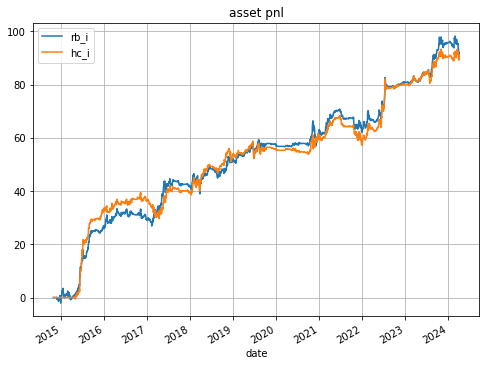

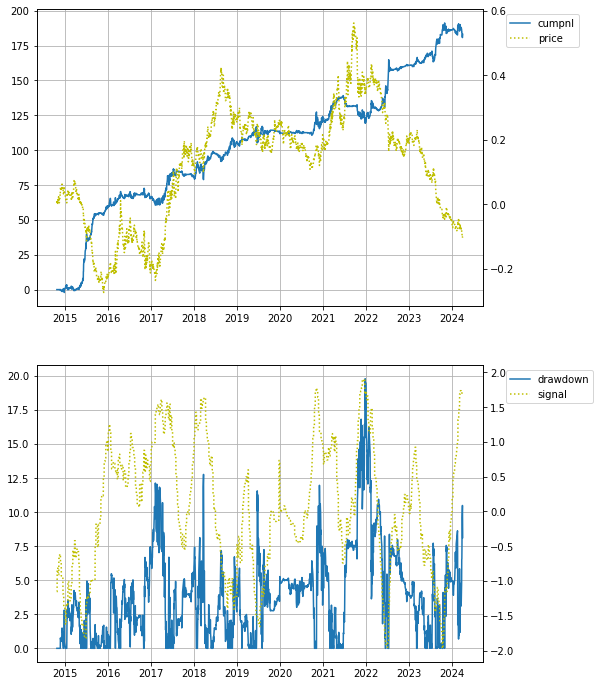

signal=io_pinv45_lvl_hlr 
sharpe        0.936124
sharpe_6m    -0.030971
sharpe_1y     1.318260
sharpe_2y     1.638721
sharpe_3y     0.993957
sharpe_4y     1.102865
sharpe_5y     1.120540
sharpe_6y     1.235434
sharpe_7y     1.186698
sharpe_8y     1.017340
sharpe_9y     0.958575
sharpe_10y    0.936124
Name: total, dtype: float64
                rb_i      hc_i
sharpe      0.962029  0.858549
sharpe_6m  -0.230769  0.182493
sharpe_1y   1.435356  1.126600
sharpe_2y   1.600290  1.595822
sharpe_3y   0.978816  0.957578
sharpe_4y   1.181673  0.945583
sharpe_5y   1.168283  0.999028
sharpe_6y   1.273601  1.105768
sharpe_7y   1.190649  1.094451
sharpe_8y   1.045283  0.911974
sharpe_9y   0.984891  0.859335
sharpe_10y  0.962029  0.858549
      pnl_per_trade  turnover
rb_i     102.426944  7.252192
hc_i      92.804986  7.410454


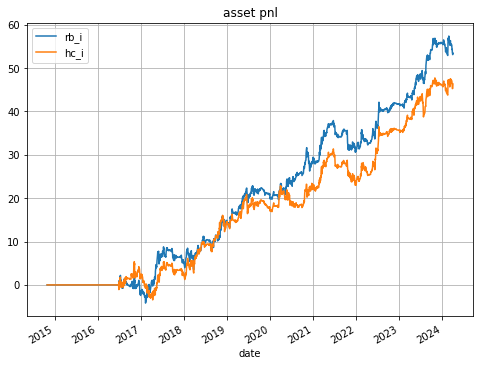

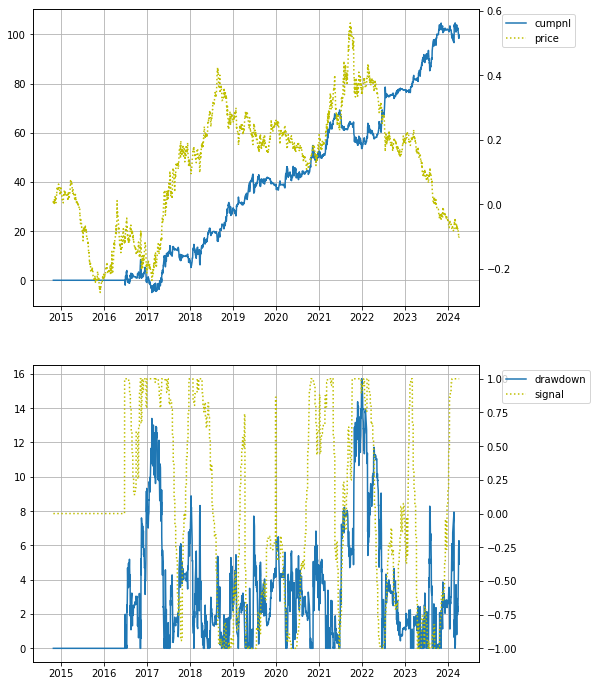

signal=combo 
sharpe        1.181720
sharpe_6m     0.009021
sharpe_1y     1.254175
sharpe_2y     1.638658
sharpe_3y     1.014429
sharpe_4y     1.126649
sharpe_5y     1.075691
sharpe_6y     1.182980
sharpe_7y     1.165030
sharpe_8y     1.019654
sharpe_9y     1.215044
sharpe_10y    1.181720
Name: total, dtype: float64
                rb_i      hc_i
sharpe      1.157440  1.134687
sharpe_6m  -0.219665  0.253896
sharpe_1y   1.310389  1.118057
sharpe_2y   1.551021  1.646187
sharpe_3y   0.972522  1.004510
sharpe_4y   1.134076  1.040014
sharpe_5y   1.086474  0.993403
sharpe_6y   1.186334  1.091201
sharpe_7y   1.134673  1.107448
sharpe_8y   1.031356  0.928871
sharpe_9y   1.199275  1.135728
sharpe_10y  1.157440  1.134687
      pnl_per_trade  turnover
rb_i     117.470203  7.231931
hc_i     120.294770  7.421159


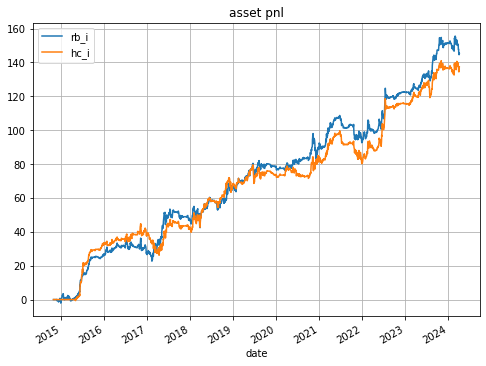

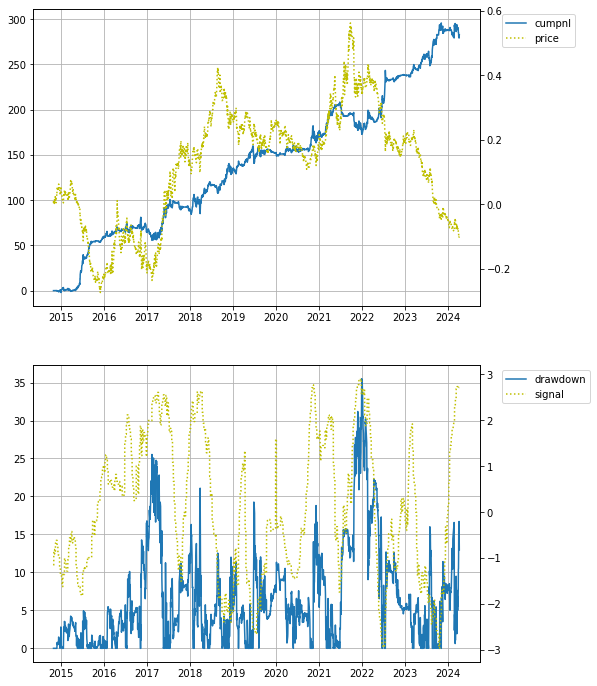

std:
io_pinv31_lvl_zsa    0.967088
io_pinv45_lvl_hlr    0.776717
combo                1.697797
dtype: float64

corr:
                   io_pinv31_lvl_zsa  io_pinv45_lvl_hlr
io_pinv31_lvl_zsa           1.000000           0.904561
io_pinv45_lvl_hlr           0.904561           1.000000



In [12]:
pnl_df = pd.DataFrame(index=df_pxchg.index)
for signal_name in signal_dict:
    signal_df = signal_dict[signal_name]
    holding = generate_holding_from_signal(signal_df, vol_df, risk_scaling=1.0, asset_scaling=False)    
    bt_metrics = MetricsBase(holdings=holding[empiric_assets][cutoff:],
                             returns=df_pxchg[empiric_assets][cutoff:], shift_holdings=1)

    pnl_stats = bt_metrics.calculate_pnl_stats(shift=0, use_log_returns=False, tenors=pnl_tenors)

    print('signal=%s \n%s' % (signal_name, pnl_stats['sharpe']))
    print(pnl_stats['asset_sharpe_stats'])
    print(pd.DataFrame({key: pnl_stats[key] for key in ['pnl_per_trade', 'turnover']}))
    pnl_df[signal_name] = pnl_stats['portfolio_pnl']['total']

    pnl_stats['asset_cumpnl'].plot(figsize=(8,6))
    plt.grid()
    plt.title('asset pnl')
    plt.show()
    plot_signal_pnl(pnl_stats['portfolio_cumpnl'], signal=signal_df.iloc[:, 0], asset_price=df_pxchg[empiric_assets[0]].cumsum(), figsize=(8, 12))

corr_cutoff = '2019-01-01'
print("std:\n%s\n" % pnl_df[corr_cutoff:].std(axis=0))

pnl_w_df = pnl_df.drop(columns=['combo']).resample('W').sum()
print("corr:\n%s\n" % pnl_w_df[corr_cutoff:].corr())

In [ ]:
import pypfopt
from pypfopt import plotting
from pypfopt import risk_models
from pypfopt import EfficientFrontier
from pypfopt import expected_returns

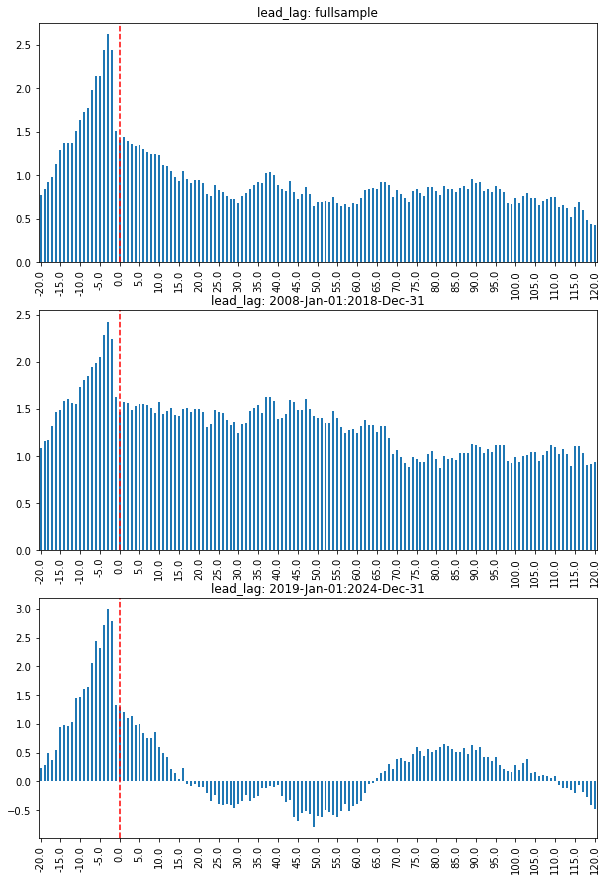

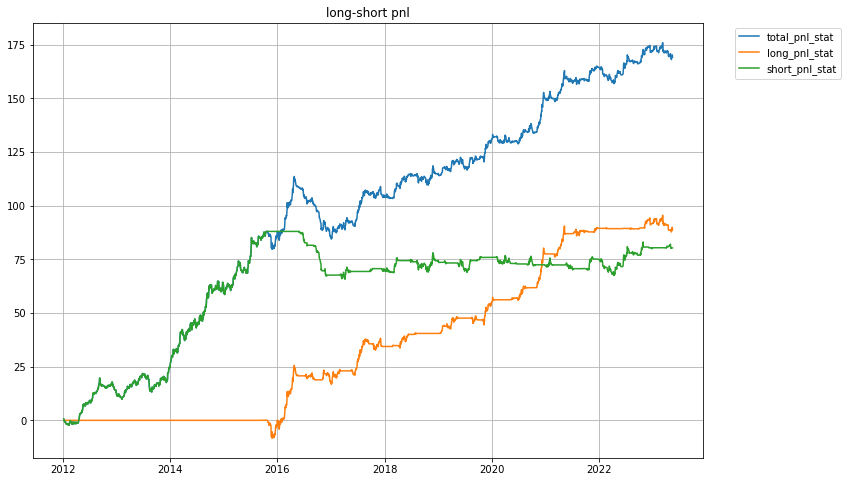

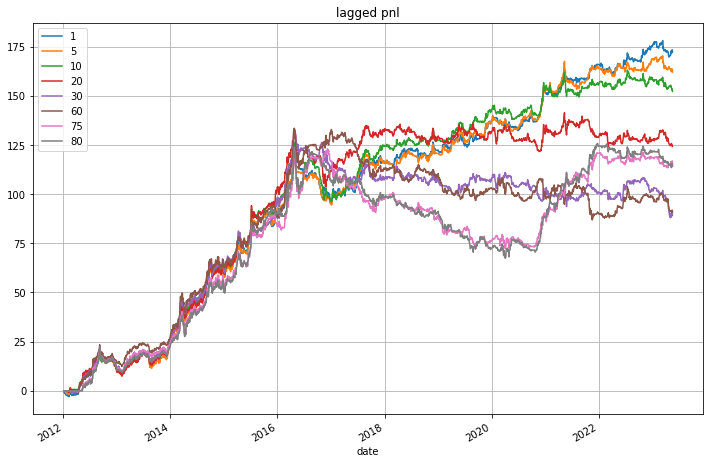

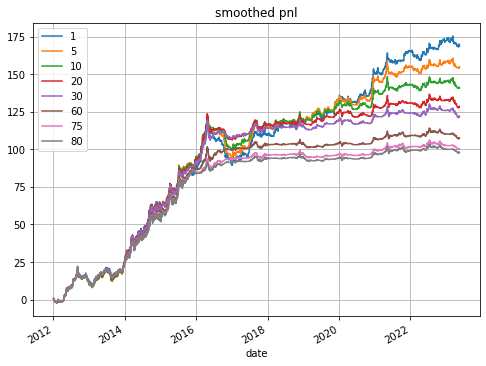

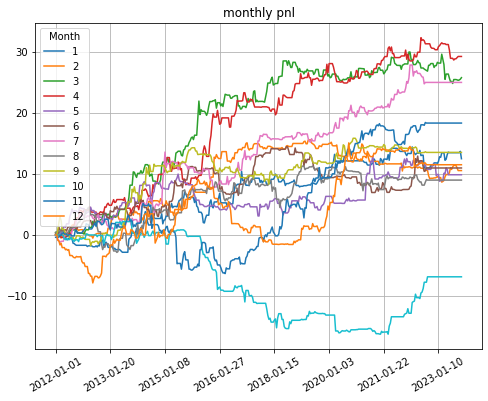

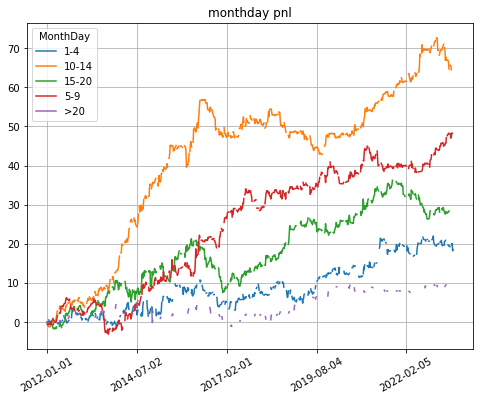

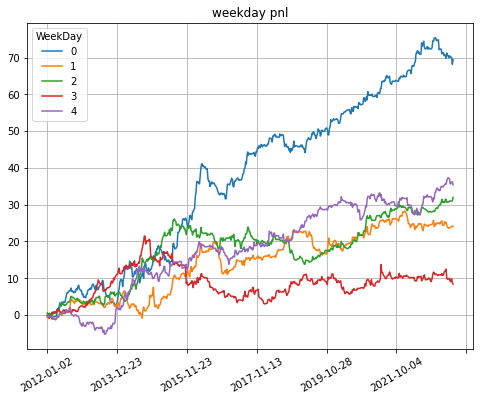

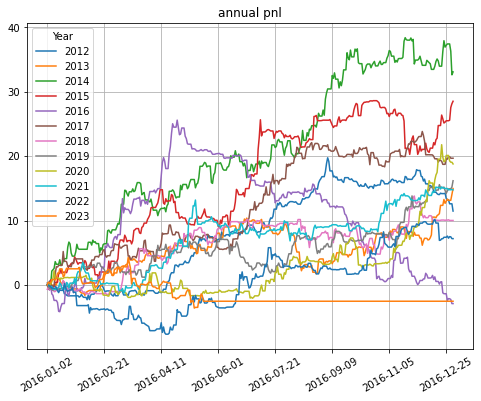

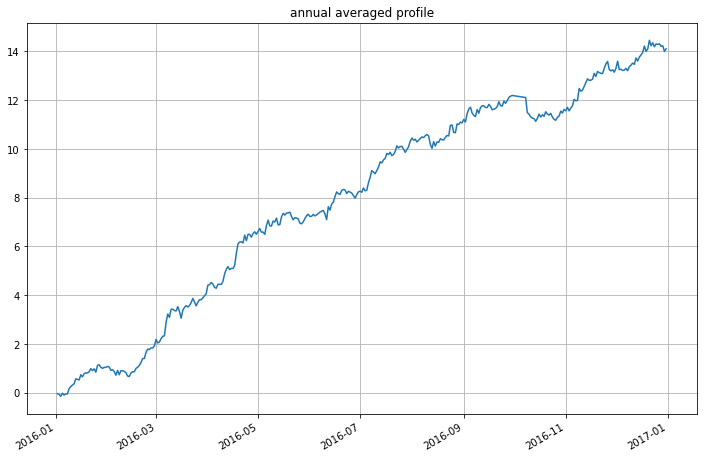

In [28]:
lead_lag_config = {
    'll_left': -20,
    'll_right': 120,
    'll_spacing': 5,
    'll_sub_win': [(datetime.date(2008, 1, 1), datetime.date(2018, 12, 31)), 
                   (datetime.date(2019, 1, 1), datetime.date(2024, 12, 31)),],
}

ll_keys = ['fullsample'] + ['%s:%s' % (sd.strftime('%Y-%b-%d'), ed.strftime('%Y-%b-%d')) for sd, ed in lead_lag_config['ll_sub_win']]


ll_left = lead_lag_config['ll_left']
ll_right = lead_lag_config['ll_right']
spacing = lead_lag_config['ll_spacing']

leadlag_df = bt_metrics.lead_lag(ll_limit_left=ll_left, 
                                 ll_limit_right=ll_right,
                                 ll_sub_windows=lead_lag_config['ll_sub_win'])

fig, ax = plt.subplots(len(ll_keys), 1)
fig.set_figheight(15)
fig.set_figwidth(10)

for i, key in enumerate(ll_keys):
    ts = leadlag_df['leadlag_sharpes'].loc[key]
    ts.plot(kind='bar', ax = ax[i], title = f'lead_lag: {key}')
    new_ticks = np.linspace(ll_left, ll_right, (ll_right-ll_left)//spacing+1)
    ax[i].set_xticks(np.interp(new_ticks, ts.index, np.arange(ts.size)))
    ax[i].set_xticklabels(new_ticks)
    ax[i].axvline(x=-ll_left, color='red', linestyle='--')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ls_pnl = bt_metrics.long_short_pnl()
for key in ls_pnl:
    ax.plot(ls_pnl[key]['portfolio_cumpnl'].index, ls_pnl[key]['portfolio_cumpnl'].values, '-', label=key)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, bbox_to_anchor=(1.04, 1), loc='upper left')
ax.grid()
plt.title("long-short pnl")
plt.show()

lagged = bt_metrics.lagged_pnl(lags=[1, 5, 10, 20, 30, 60, 75, 80])
lagged['cumpnl'].plot()
#print('lagged PNL\n', lagged['sharpe'])
plt.grid()
plt.title('lagged pnl')
plt.show()

smoothed = bt_metrics.smoothed_pnl(smooth_hls=[1, 5, 10, 20, 30, 60, 75, 80])
smoothed['cumpnl'].plot(figsize=(8, 6))
#print('smoothed PNL\n', smoothed['sharpe'])
plt.grid()
plt.title('smoothed pnl')
plt.show()

#tilt_timing = bt_metrics.tilt_timing(tilt_rolling_window=1*244) # default 3 years  tilt_rolling_window = 3 * 244 

seasonal_pnl = bt_metrics.seasonal_pnl()
cumpnl = seasonal_pnl['cumlog_pnl']
cumpnl.set_index(cumpnl.index.astype('str')).plot(rot=30, figsize = (8, 6))
#print('seasonal sharpe stats\n', seasonal_pnl['sharpe_stats'])
plt.grid()
plt.title('monthly pnl')
plt.show()


monthday_pnl = bt_metrics.monthday_pnl()
cumpnl = monthday_pnl['cumlog_pnl']
cumpnl.set_index(cumpnl.index.astype('str')).plot(rot=30, figsize = (8, 6))
#print('monthday sharpe stats\n', monthday_pnl['sharpe_stats'])
plt.grid()
plt.title('monthday pnl')
plt.show()


week_pnl = bt_metrics.week_pnl()
cumpnl = week_pnl['cumlog_pnl']
cumpnl.set_index(cumpnl.index.astype('str')).plot(rot=30, figsize = (8, 6))
#print('week sharpe stats\n', week_pnl['sharpe_stats'])
plt.grid()
plt.title('weekday pnl')
plt.show()


annual_pnl = bt_metrics.annual_pnl()
cumpnl = annual_pnl['cumlog_pnl']
cumpnl.set_index(cumpnl.index.astype('str')).plot(rot=30, figsize = (8, 6))
#print('annual sharpe stats\n', annual_pnl['sharpe_stats'])
plt.grid()
plt.title('annual pnl')
plt.show()

annual_pnl['cumlog_pnl'].mean(axis=1).plot()
plt.grid()
plt.title('annual averaged profile')
plt.show()

# turnover = bt_metrics.turnover()
# print(turnover)

# batch feature exploration

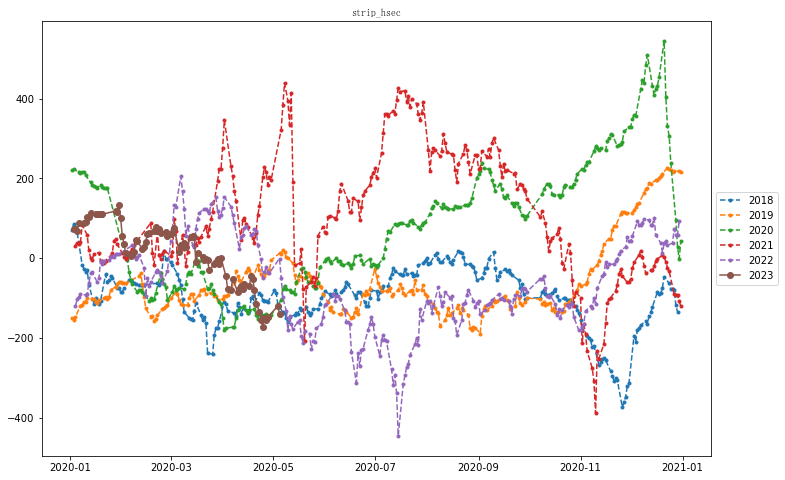

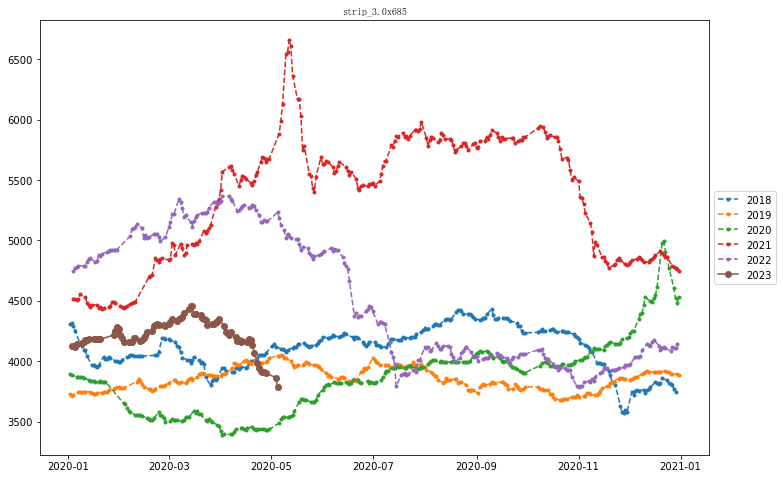

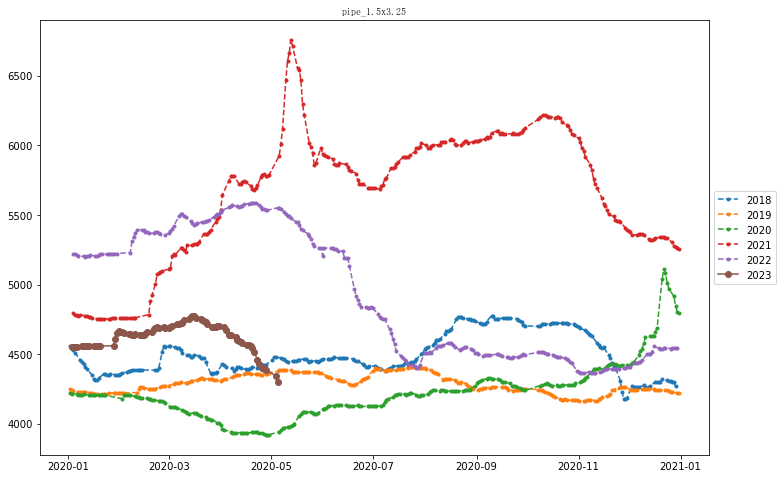

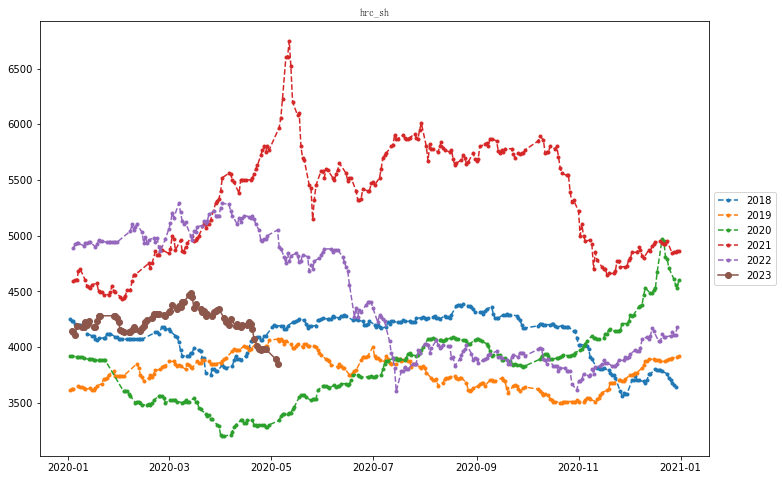

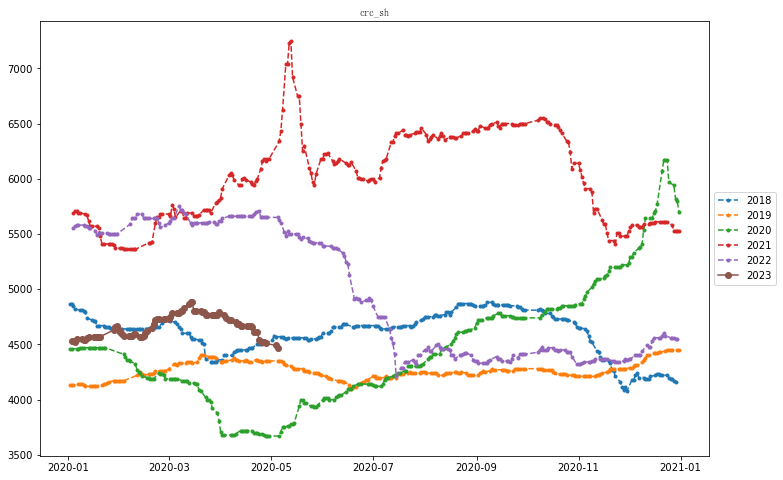

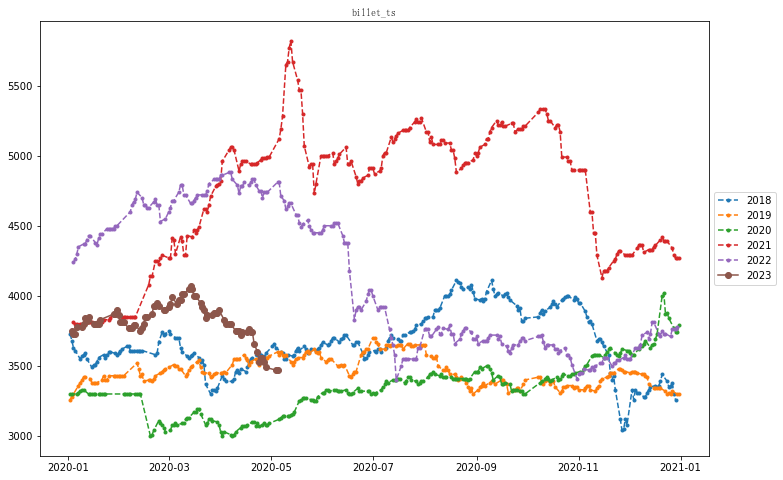

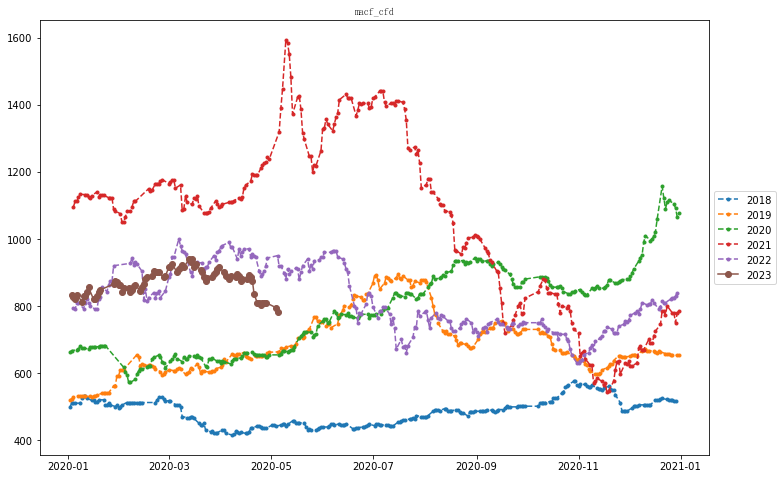

In [116]:
feature_list = [
#     'margin_hrc_sh', 
    'strip_hsec',
    'strip_3.0x685',
    'pipe_1.5x3.25',    
    'hrc_sh',
    'crc_sh',
    'billet_ts',
    'macf_cfd',
#     'gi_0.5_sh',
#     'hsec_400x200',
#     'highwire_6.5',
#     'angle_50x5',
#     'ibeam_25',
#     'channel_16',

#     'import_arb', 'pbf_prem', 'plt65_62',
#     'io_laytime_45ports', 'io_inv_imp_31ports',
#     'io_invdays_imp_mill(64)', 'io_inv_mill(64)', 'io_inv_imp_mill',
#     'io_removal_port_41',
#     'io_loading_14ports_ausbzl',
]

udf = spot_df[feature_list].dropna(how='all')
# lunar_seasonal = True

# if lunar_seasonal:
#     seasonal_signal = tstool.lunar_label(udf)
#     seasonal_signal = tstool.seasonal_group_score(
#         seasonal_signal, score_cols=feature_list, yr_col='lunar_cny',
#         group_col='lunar_wks', min_obs=3, backward=2, forward=2, rolling_years=3)
#     seasonal_signal = seasonal_signal.reindex(index=df.index).ffill()

for feature in udf.columns:
    dataseries.plot_seasonal_df(udf[feature].dropna(), cutoff='2018-01-01', title=feature)
    
signal_raw = udf[feature_list].reindex(index=df.index).ffill()


rb:strip_hsec -> SR: 1.00 -- PNL per trade: 33.08 -- Turnover: 26.72
rb:strip_3.0x685 -> SR: 1.07 -- PNL per trade: 55.20 -- Turnover: 17.46
rb:pipe_1.5x3.25 -> SR: 0.85 -- PNL per trade: 53.25 -- Turnover: 14.26
rb:hrc_sh -> SR: 1.11 -- PNL per trade: 46.67 -- Turnover: 21.92
rb:crc_sh -> SR: 1.03 -- PNL per trade: 60.39 -- Turnover: 15.17
rb:billet_ts -> SR: 0.85 -- PNL per trade: 30.21 -- Turnover: 26.18
rb:macf_cfd -> SR: 1.18 -- PNL per trade: 77.03 -- Turnover: 13.00


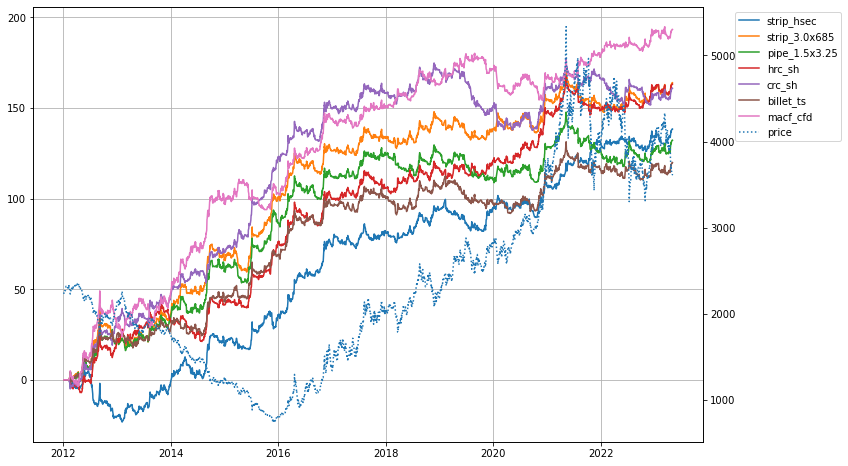

hc:strip_hsec -> SR: 1.25 -- PNL per trade: 42.52 -- Turnover: 28.27
hc:strip_3.0x685 -> SR: 0.96 -- PNL per trade: 49.43 -- Turnover: 19.23
hc:pipe_1.5x3.25 -> SR: 0.72 -- PNL per trade: 49.98 -- Turnover: 13.95
hc:hrc_sh -> SR: 1.26 -- PNL per trade: 54.48 -- Turnover: 23.52
hc:crc_sh -> SR: 0.87 -- PNL per trade: 53.23 -- Turnover: 16.00
hc:billet_ts -> SR: 0.71 -- PNL per trade: 27.15 -- Turnover: 26.33
hc:macf_cfd -> SR: 0.89 -- PNL per trade: 48.24 -- Turnover: 17.91


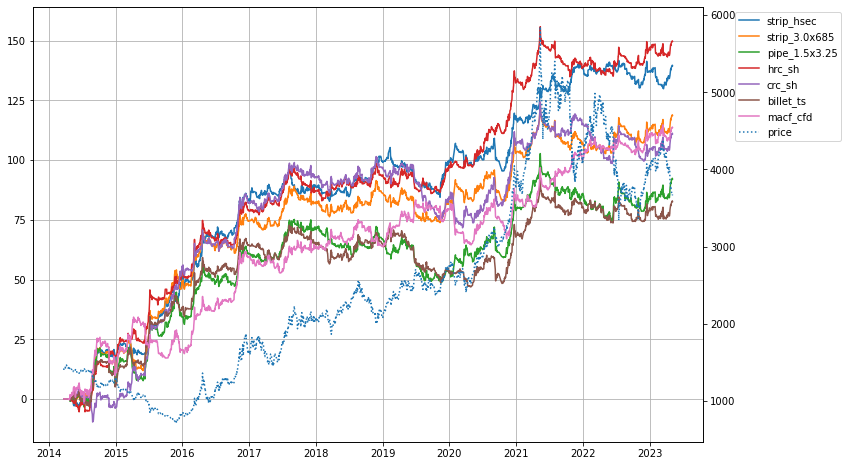

i:strip_hsec -> SR: 1.37 -- PNL per trade: 74.96 -- Turnover: 26.70
i:strip_3.0x685 -> SR: 1.02 -- PNL per trade: 81.14 -- Turnover: 18.90
i:pipe_1.5x3.25 -> SR: 0.76 -- PNL per trade: 79.20 -- Turnover: 14.08
i:hrc_sh -> SR: 1.05 -- PNL per trade: 70.10 -- Turnover: 23.09
i:crc_sh -> SR: 0.73 -- PNL per trade: 67.10 -- Turnover: 16.17
i:billet_ts -> SR: 0.85 -- PNL per trade: 49.90 -- Turnover: 26.78
i:macf_cfd -> SR: 1.52 -- PNL per trade: 132.16 -- Turnover: 16.51


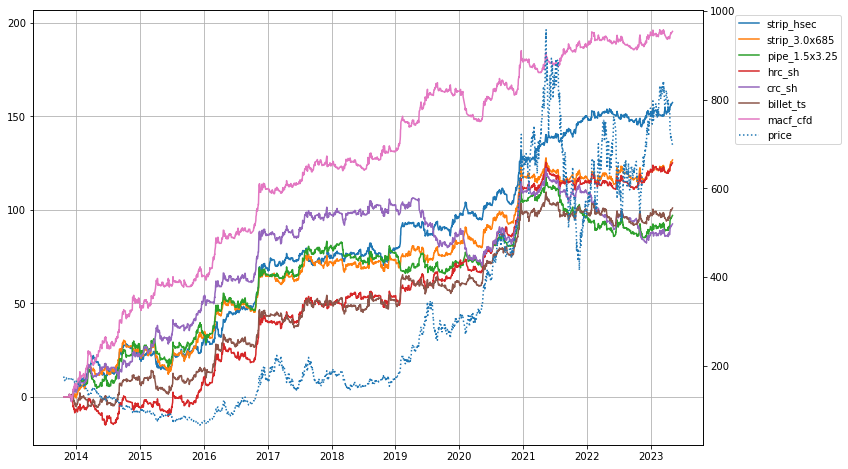

j:strip_hsec -> SR: 1.26 -- PNL per trade: 53.79 -- Turnover: 27.92
j:strip_3.0x685 -> SR: 1.37 -- PNL per trade: 89.78 -- Turnover: 17.88
j:pipe_1.5x3.25 -> SR: 1.49 -- PNL per trade: 121.06 -- Turnover: 14.14
j:hrc_sh -> SR: 1.07 -- PNL per trade: 59.06 -- Turnover: 22.09
j:crc_sh -> SR: 1.50 -- PNL per trade: 115.20 -- Turnover: 15.14
j:billet_ts -> SR: 1.23 -- PNL per trade: 56.59 -- Turnover: 26.66
j:macf_cfd -> SR: 1.32 -- PNL per trade: 109.48 -- Turnover: 13.21


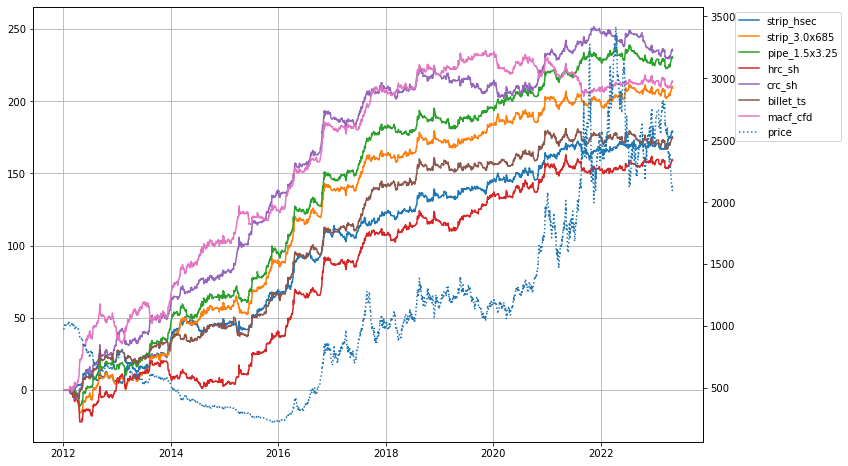

jm:strip_hsec -> SR: 1.11 -- PNL per trade: 47.05 -- Turnover: 27.42
jm:strip_3.0x685 -> SR: 1.10 -- PNL per trade: 69.23 -- Turnover: 18.61
jm:pipe_1.5x3.25 -> SR: 1.11 -- PNL per trade: 91.50 -- Turnover: 13.80
jm:hrc_sh -> SR: 0.74 -- PNL per trade: 38.50 -- Turnover: 23.06
jm:crc_sh -> SR: 1.26 -- PNL per trade: 93.10 -- Turnover: 15.35
jm:billet_ts -> SR: 0.85 -- PNL per trade: 37.64 -- Turnover: 27.50
jm:macf_cfd -> SR: 0.93 -- PNL per trade: 65.74 -- Turnover: 15.77


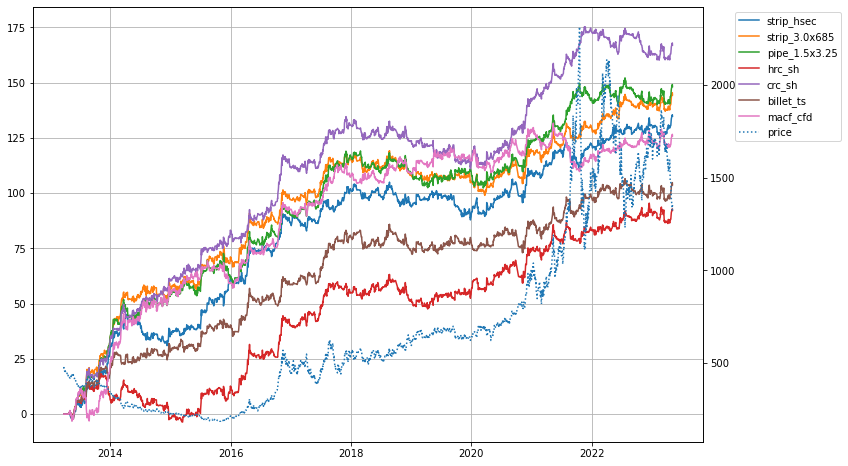

SF:strip_hsec -> SR: 0.18 -- PNL per trade: 6.28 -- Turnover: 30.83
SF:strip_3.0x685 -> SR: 0.70 -- PNL per trade: 35.25 -- Turnover: 21.70
SF:pipe_1.5x3.25 -> SR: 0.89 -- PNL per trade: 61.14 -- Turnover: 15.48
SF:hrc_sh -> SR: 0.94 -- PNL per trade: 42.61 -- Turnover: 24.70
SF:crc_sh -> SR: 1.28 -- PNL per trade: 86.06 -- Turnover: 15.70
SF:billet_ts -> SR: 0.69 -- PNL per trade: 28.08 -- Turnover: 27.31
SF:macf_cfd -> SR: 0.66 -- PNL per trade: 31.76 -- Turnover: 22.86


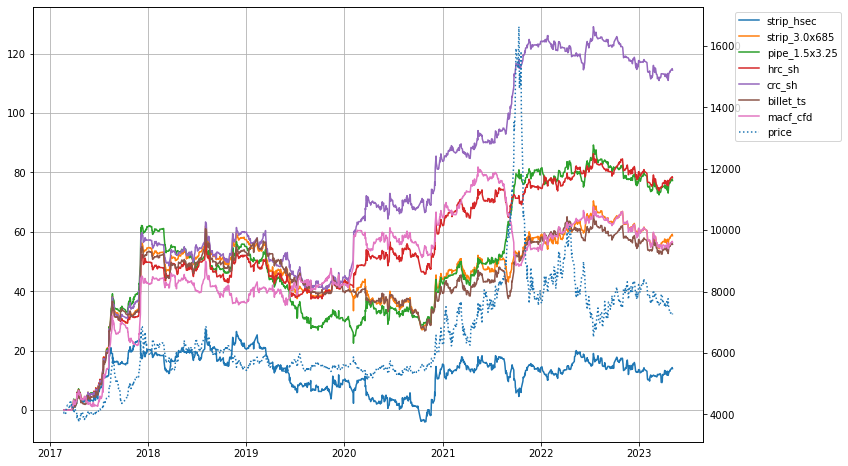

FG:strip_hsec -> SR: 1.09 -- PNL per trade: 38.09 -- Turnover: 29.64
FG:strip_3.0x685 -> SR: 0.48 -- PNL per trade: 25.14 -- Turnover: 20.07
FG:pipe_1.5x3.25 -> SR: 0.31 -- PNL per trade: 21.01 -- Turnover: 14.80
FG:hrc_sh -> SR: 0.87 -- PNL per trade: 38.18 -- Turnover: 23.47
FG:crc_sh -> SR: 0.40 -- PNL per trade: 24.92 -- Turnover: 16.19
FG:billet_ts -> SR: 0.76 -- PNL per trade: 29.74 -- Turnover: 26.37
FG:macf_cfd -> SR: 0.65 -- PNL per trade: 33.69 -- Turnover: 19.86


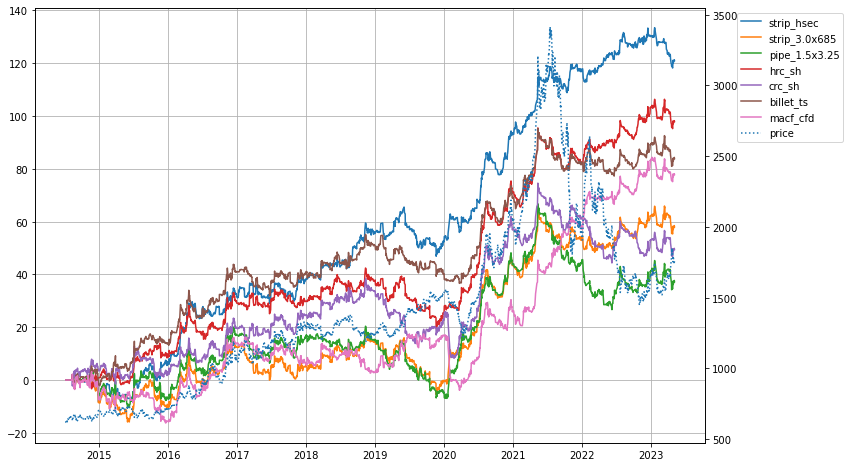

In [118]:
cutoff = '2012-01-01'
signal_func = 'qtl'
param_rng = [20, 42, 2]
signal_cap = None # [-2, 2]
product_list = ['rb', 'hc', 'i', 'j', 'jm', 'SF', 'FG', ] # 'v', 'cu', 'al', 'ss', 'UR', 'SA', 'ru'

for asset in product_list:
    if '_' in asset:
        price_ts = (1 + beta_ret_dict[asset]).cumprod().to_frame('price')[cutoff:]
    else:
        price_ts = df[(asset, 'c1', 'close')].dropna().to_frame('price')[cutoff:]
    pnl_list = [price_ts]
    for feature in feature_list:
        feature_ts = udf[feature].reindex(index=price_ts.index).ffill()
        #feature_ts = feature_ts.pct_change(5)
        #feature_ts = tstool.lunar_yoy(feature_ts, group_col='lunar_days', func='pct_change')
        #feature_ts = tstool.seasonal_score(feature_ts.to_frame())
        signal_ts = calc_conv_signal(feature_ts, signal_func=signal_func, param_rng=param_rng, signal_cap=signal_cap)
        asset_df = pd.concat([price_ts, signal_ts], axis=1)
        asset_df.columns = ['price', 'signal']
        asset_df['signal'] = asset_df['signal'].apply(lambda x: x).ffill()
        asset_df = asset_df.dropna(subset=['price'])
        asset_df['position'] = (asset_df['signal']/asset_df['price'].pct_change().rolling(20).std()).shift(1).fillna(0)
        asset_df['pnl'] = (asset_df['position'].shift(1) * asset_df['price'].pct_change()).fillna(0)
        
        sr = np.sqrt(244) * asset_df['pnl'].mean()/asset_df['pnl'].std()
        pnl_per_trade = 100 * 100 * asset_df['pnl'].mean()/asset_df['position'].diff().abs().mean()
        turnover = 100 * asset_df['position'].diff().abs().mean()/asset_df['position'].abs().mean()
        print(f'{asset}:{feature} -> SR: {sr:.2f} -- PNL per trade: {pnl_per_trade:.2f} -- Turnover: {turnover:.2f}')
        pnl_list.append(asset_df['pnl'].cumsum().to_frame(feature))
    pnl_df = pd.concat(pnl_list, axis=1)
    dataseries.plot_df_on_2ax(pnl_df, left_on=feature_list, right_on=['price'])
    

# signal grid search run

In [ ]:
signal_list = []

for feature in feature_list:
    for win in [20, 40, 60, 80, 120, 240]:
        signal_name = f"{feature}:ma:{win}"
        signal_raw[signal_name] = signal_raw[feature] - signal_raw[feature].rolling(win).mean()
        signal_raw[signal_name] = dh.risk_normalized(signal_raw[signal_name], 60)
        signal_list.append(signal_name)
        
        signal_name = f"{feature}:ewmac:{win}"
        signal_raw[signal_name] = dh.ewmac(signal_raw[feature], win_s=win/10, ls_ratio=2)
        signal_raw[signal_name] = dh.risk_normalized(signal_raw[signal_name], 60)
        signal_list.append(signal_name)

#         signal_name = f"{feature}:convewm:{win}"
#         signal_raw[signal_name] = dh.conv_ewm(signal_raw[feature], h1s=[win//10, win//10*2], h2s=[win//10*3, win//10*6])
#         signal_raw[signal_name] = dh.risk_normalized(signal_raw[signal_name], 60)
#         signal_list.append(signal_name)
        
        signal_name = f"{feature}:zscore:{win}"
        signal_raw[signal_name] = dh.zscore_roll(signal_raw[feature], win=win)
        signal_list.append(signal_name) 
        
        signal_name = f"{feature}:zscore_dff20:{win}"
        signal_raw[signal_name] = dh.zscore_roll(signal_raw[feature].diff(20), win=win)
        signal_list.append(signal_name) 
        
        signal_name = f"{feature}:qtl:{win}"
        signal_raw[signal_name] = dh.pct_score(signal_raw[feature], win=win)*2
        signal_list.append(signal_name) 
        
        signal_name = f"{feature}:qtl_dff20:{win}"
        signal_raw[signal_name] = dh.pct_score(signal_raw[feature].diff(20), win=win)*2
        signal_list.append(signal_name)
        
        signal_name = f"{feature}:lunar_wks_score:{win}"
        signal_raw[signal_name] = seasonal_signal[feature]
        signal_list.append(signal_name)
        
        signal_prefix = f"{feature}:seasonal_score"
        signal_raw[signal_prefix] = tstool.seasonal_score(signal_raw[feature].to_frame())
        signal_name = f"{signal_prefix}_pct:{win}"
        signal_raw[signal_name] = dh.pct_score(signal_raw[feature], win=win)*2
        signal_list.append(signal_name) 
        signal_name = f"{signal_prefix}_zscore:{win}"
        signal_raw[signal_name] = dh.zscore_roll(signal_raw[feature], win=win)
        signal_list.append(signal_name)
        
        signal_prefix = f"{feature}:yoy"
        signal_raw[signal_prefix] = signal_raw[feature]/signal_raw[feature].shift(244)-1
        signal_name = f"{signal_prefix}_pct:{win}"
        signal_raw[signal_name] = dh.pct_score(signal_raw[feature], win=win)*2
        signal_list.append(signal_name) 
        signal_name = f"{signal_prefix}_zscore:{win}"
        signal_raw[signal_name] = dh.zscore_roll(signal_raw[feature], win=win)
        signal_list.append(signal_name)

        signal_prefix = f"{feature}:lunar_yoy"
        signal_raw[signal_prefix] = tstool.lunar_yoy(signal_raw[feature], group_col='lunar_days', func='pct_change')
        signal_name = f"{signal_prefix}_pct:{win}"
        signal_raw[signal_name] = dh.pct_score(signal_raw[feature], win=win)*2
        signal_list.append(signal_name) 
        signal_name = f"{signal_prefix}_zscore:{win}"
        signal_raw[signal_name] = dh.zscore_roll(signal_raw[feature], win=win)
        signal_list.append(signal_name)
        
signal_raw = signal_raw.reindex(index=df.index).ffill()

In [ ]:
product_list = ['rb', 'hc', 'i', 'j', 'jm', 'v', 'FG', 'SM', 'SF']
cutoff = pd.Timestamp('2012-07-01')

for sig in signal_list:
    print(sig)
    pnl_by_asset = {}
    pnl_df = pd.DataFrame()
    pos_df = pd.DataFrame()
    for asset in product_list:
        signal = signal_raw[sig]
        asset_df = pd.concat([df[(asset, 'c1', 'close')], signal], axis=1)
        asset_df.columns = ['price', 'signal']
        asset_df['signal'] = asset_df['signal'].apply(lambda x: x).ffill()
        asset_df = asset_df.dropna(subset=['price']).ffill()
        asset_df['position'] = (asset_df['signal']/asset_df['price'].pct_change().rolling(20).std()).shift(1).fillna(0)
        asset_df['pnl'] = (asset_df['position'].shift(1) * asset_df['price'].pct_change()).fillna(0)
        
        sr = np.sqrt(244) * asset_df['pnl'].mean()/asset_df['pnl'].std()
        pnl_per_trade = 100 * 100 * asset_df['pnl'].mean()/asset_df['position'].diff().abs().mean()
        turnover = 100 * asset_df['position'].diff().abs().mean()/asset_df['position'].abs().mean()
        print(f'{asset} -> SR: {sr:.2f} -- PNL per trade: {pnl_per_trade:.2f} -- Turnover: {turnover:.2f}')
        
        pnl_by_asset[asset] = asset_df
        pnl_df[asset] = asset_df['pnl']
        pos_df[asset] = asset_df['position']
    pnl_df = pnl_df.fillna(0)
    pos_df = pos_df.ffill()
    total_sr = = np.sqrt(244) * pnl_df.sum(axis=1).mean()/pnl_df.sum(axis=1).std()
    print(f'Total SR: {total_sr:.2f}')
    
    cumpn; = pnl_df.cumsum()
    cumpnl.plot()
    plt.title(sig)
    plt.show()
    cum_pnl.sum(axis=1).plot()
    plt.title(sig)
    plt.show()
    

# Signal portfolio

In [111]:
signal_dict_full = {
    'i': [
        ('io_removal_lvl_fast', 1.0), 
        #('io_removal_lyoy_mom', 1.0),
        
        ('io_inv_mill(64)_lvl_fast', 0.5),
        #('io_inv_mill(64)_lyoy_mom', 0.5),
        
        ('io_invdays_imp_mill(64)_lvl_fast', 0.5),
        #('io_invdays_imp_mill(64)_lyoy_mom', 0.5),
        
#         ('steel_social_inv_lvl_fast', 1.0/1.0),
#         ('rebar_inv_social_lyoy_fast', 0.25/1.0),
#         ('wirerod_inv_social_lyoy_fast', 0.25/1.0),
#         ('hrc_inv_social_lyoy_fast', 0.25/1.0),
#         ('crc_inv_social_lyoy_fast', 0.25/1.0),
        
        ('margin_lvl_fast', 1.0),
        ('strip_hsec_lvl_mid', 1.0),
        ('macf_cfd_lvl_mid', 1.0),
#         ('pbf_prem_yoy', 0.5/15),
#         ('cons_steel_lyoy_slow', 1.0/1.5),
#         ('sea_export_arb_lvl_mid', 1.0/1.4),
    ],
    'rb': [
        ('io_removal_lvl_fast', 1.0), 
        #('io_removal_lyoy_mom', 1.0),
        
        ('io_inv_mill(64)_lvl_fast', 1.0),
        #('io_inv_mill(64)_lyoy_mom', 1.0),
        
#         ('rebar_inv_social_lyoy_fast', 1.0),
#         ('wirerod_inv_social_lyoy_fast', 1.0),
        
        ('margin_lvl_fast', 1.0),
        ('strip_hsec_lvl_mid', 1.0),    
    ],
    'hc': [
        ('io_removal_lvl_fast', 1.0), 
        #('io_removal_lyoy_mom', 1.0),
        
        ('io_inv_mill(64)_lvl_fast', 1.0),
        #('io_inv_mill(64)_lyoy_mom', 1.0),
        
#         ('hrc_inv_social_lyoy_fast', 1.0),
#         ('crc_inv_social_lyoy_fast', 1.0),        
        ('margin_lvl_fast', 1.0),
        ('strip_hsec_lvl_mid', 1.0),  
    ],
    'j': [
        #('io_removal_lvl_fast', 1.0), 
        #('io_removal_lyoy_mom', 1.0),
        
        #('io_inv_mill(64)_lvl_fast', 1.0),
        #('io_inv_mill(64)_lyoy_mom', 1.0),
        
#         ('steel_social_inv_lvl_fast', 1.0),
        
        ('margin_lvl_fast', 1.0),
        ('strip_hsec_lvl_mid', 1.0),    
    ],
    'jm': [
        #('io_inv_mill(64)_lvl_fast', 1.0),
        #('io_inv_mill(64)_lyoy_mom', 1.0),
        
#         ('steel_social_inv_lvl_fast', 1.0),
        
        ('margin_lvl_fast', 1.0),
        ('strip_hsec_lvl_mid', 1.0),     
    ],
    'FG': [
        #('io_inv_mill(64)_lvl_fast', 1.0),
        #('io_inv_mill(64)_lyoy_mom', 1.0),
        
        ('margin_lvl_fast', 1.0),
        ('strip_hsec_lvl_mid', 1.0),    
    ],
}

i:io_removal_lvl_fast -> SR: 1.44 -- PNL per trade: 125.18 -- Turnover: 16.32
i:io_inv_mill(64)_lvl_fast -> SR: 1.06 -- PNL per trade: 124.63 -- Turnover: 12.02
i:io_invdays_imp_mill(64)_lvl_fast -> SR: 1.08 -- PNL per trade: 96.53 -- Turnover: 16.77
i:margin_lvl_fast -> SR: 1.41 -- PNL per trade: 98.64 -- Turnover: 20.34
i:strip_hsec_lvl_mid -> SR: 1.35 -- PNL per trade: 101.73 -- Turnover: 19.64
i:macf_cfd_lvl_mid -> SR: 1.24 -- PNL per trade: 150.45 -- Turnover: 12.07
i:total -> SR: 1.92 -- PNL per trade: 173.72 -- Turnover: 17.79
io_removal_lvl_fast                 0.829607
io_inv_mill(64)_lvl_fast            0.438992
io_invdays_imp_mill(64)_lvl_fast    0.402572
margin_lvl_fast                     0.849863
strip_hsec_lvl_mid                  0.776010
macf_cfd_lvl_mid                    0.864912
dtype: float64


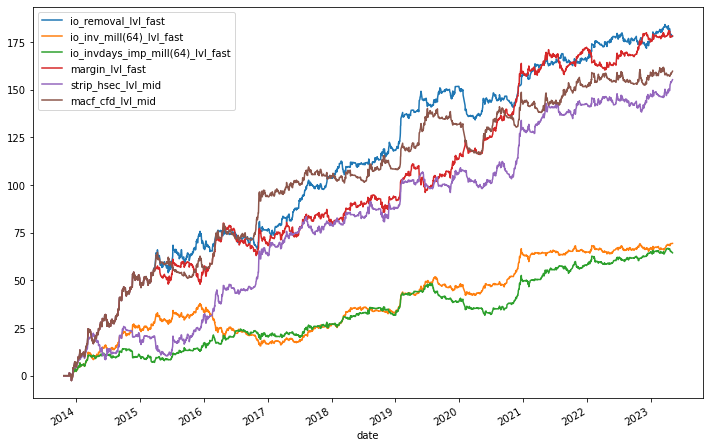

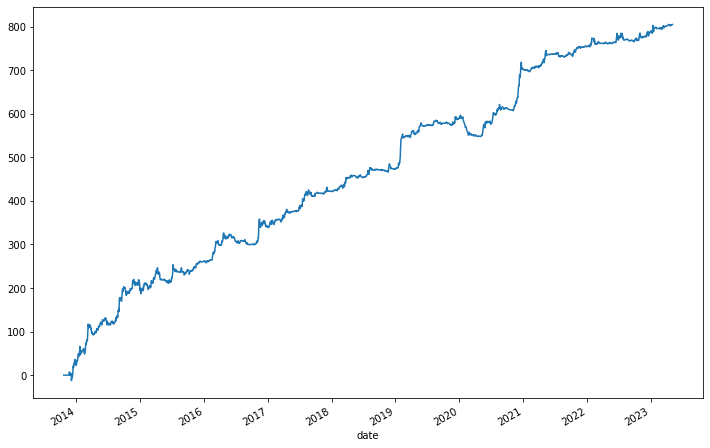

rb:io_removal_lvl_fast -> SR: 1.14 -- PNL per trade: 82.35 -- Turnover: 10.73
rb:io_inv_mill(64)_lvl_fast -> SR: 0.90 -- PNL per trade: 81.30 -- Turnover: 8.63
rb:margin_lvl_fast -> SR: 1.13 -- PNL per trade: 67.99 -- Turnover: 12.88
rb:strip_hsec_lvl_mid -> SR: 0.88 -- PNL per trade: 39.16 -- Turnover: 19.54
rb:total -> SR: 1.30 -- PNL per trade: 87.76 -- Turnover: 12.28
io_removal_lvl_fast         0.941461
io_inv_mill(64)_lvl_fast    0.974576
margin_lvl_fast             0.951824
strip_hsec_lvl_mid          0.813721
dtype: float64


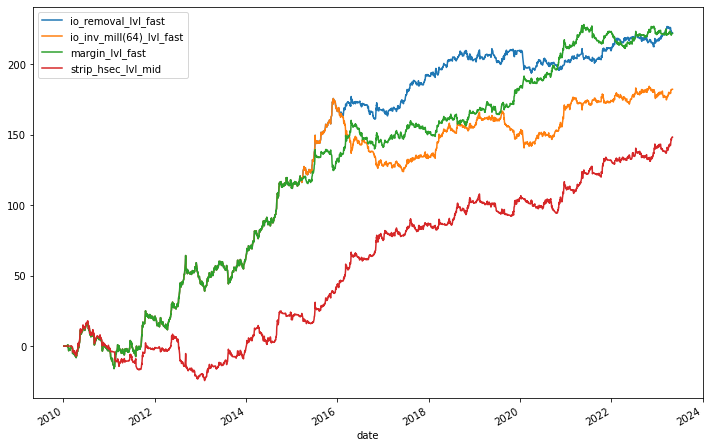

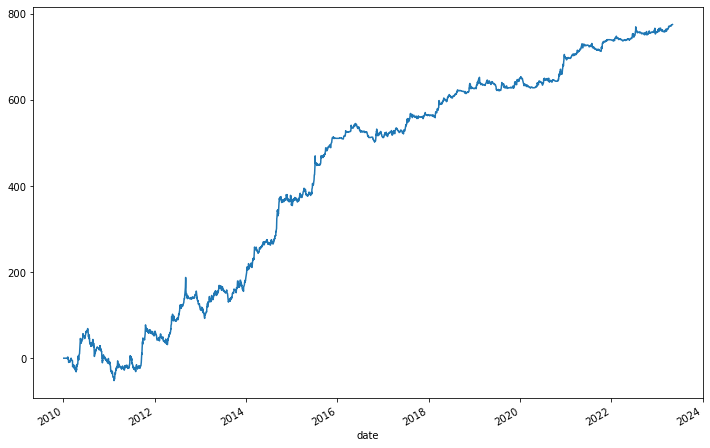

hc:io_removal_lvl_fast -> SR: 1.11 -- PNL per trade: 59.73 -- Turnover: 17.62
hc:io_inv_mill(64)_lvl_fast -> SR: 0.77 -- PNL per trade: 55.45 -- Turnover: 13.05
hc:margin_lvl_fast -> SR: 1.10 -- PNL per trade: 47.66 -- Turnover: 22.04
hc:strip_hsec_lvl_mid -> SR: 1.34 -- PNL per trade: 62.48 -- Turnover: 21.46
hc:total -> SR: 1.54 -- PNL per trade: 78.61 -- Turnover: 20.48
io_removal_lvl_fast         0.852830
io_inv_mill(64)_lvl_fast    0.902805
margin_lvl_fast             0.871381
strip_hsec_lvl_mid          0.780406
dtype: float64


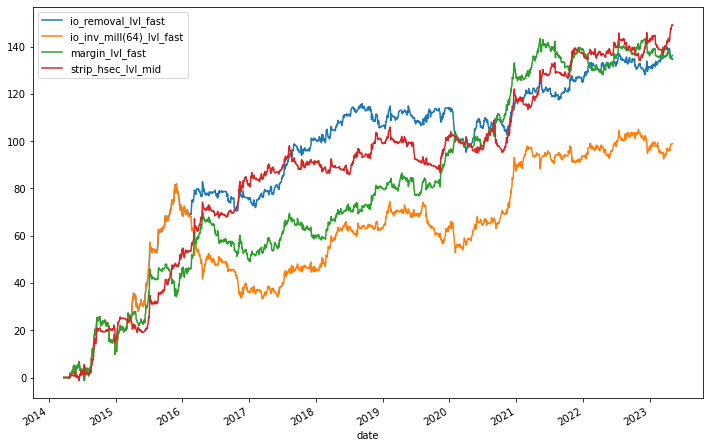

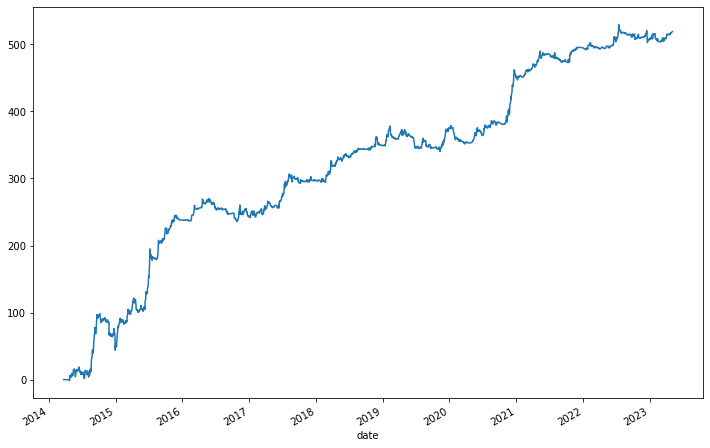

j:margin_lvl_fast -> SR: 1.72 -- PNL per trade: 123.09 -- Turnover: 14.65
j:strip_hsec_lvl_mid -> SR: 1.35 -- PNL per trade: 71.61 -- Turnover: 21.87
j:total -> SR: 1.84 -- PNL per trade: 111.75 -- Turnover: 20.35
margin_lvl_fast       0.940847
strip_hsec_lvl_mid    0.792106
dtype: float64


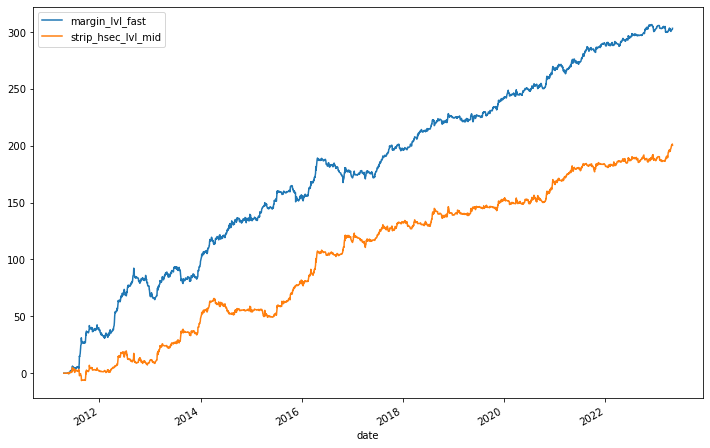

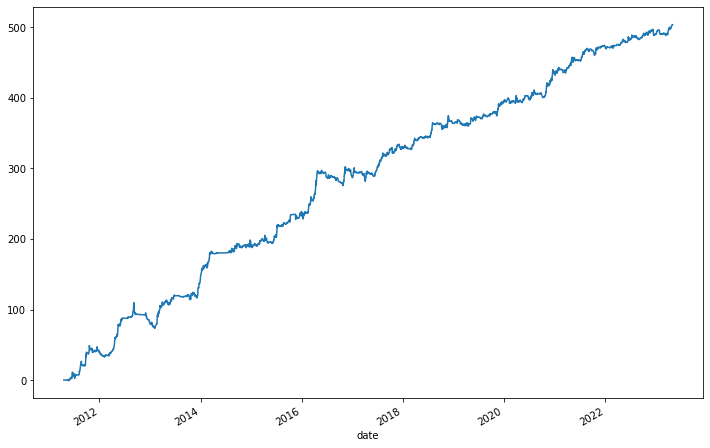

jm:margin_lvl_fast -> SR: 1.19 -- PNL per trade: 70.76 -- Turnover: 18.68
jm:strip_hsec_lvl_mid -> SR: 1.32 -- PNL per trade: 76.23 -- Turnover: 20.36
jm:total -> SR: 1.48 -- PNL per trade: 84.74 -- Turnover: 21.66
margin_lvl_fast       0.854962
strip_hsec_lvl_mid    0.761956
dtype: float64


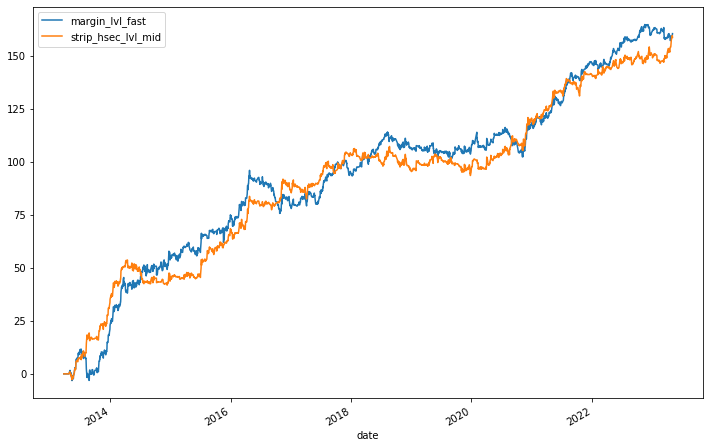

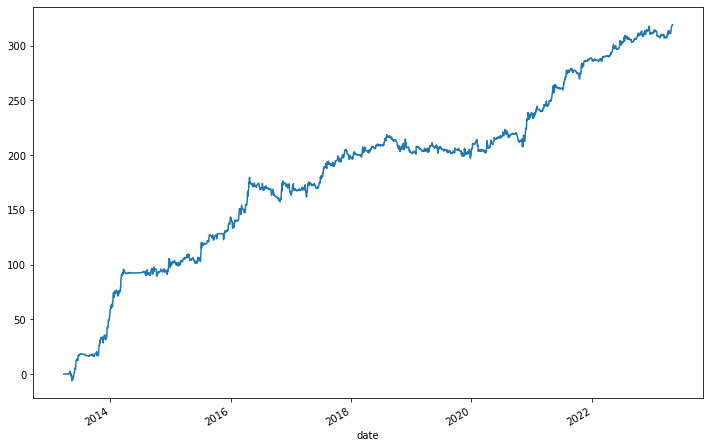

In [112]:
signal_dict = signal_dict_full

signal_diagnosis = False

pnl_dict = {}
pos_dict = {}

for asset in ['i', 'rb', 'hc', 'j', 'jm']:
    if '_' in asset:
        price_ts = (1 + beta_ret_dict[asset]).cumprod().to_frame('price')
    else:
        price_ts = df[(asset, 'c1', 'close')].dropna().to_frame('price')
    pnl_list = []
    pos_list = []
    for idx, (feature_name, weight) in enumerate(signal_dict[asset]):
        feature, signal_func, param_rng, proc_func, chg_func, bullish, freq = signal_repo[feature_name]
        if freq == 'price':
            feature_ts = spot_df[feature].ffill().reindex(index=price_ts.index).ffill()
        elif len(freq) > 0:
            feature_ts = spot_df[feature].ffill().reindex(index=pd.date_range(start=df.index[0], end=df.index[-1], freq=freq)).ffill()
        else:
            feature_ts = spot_df[feature].dropna()
        
        if 'yoy' in proc_func:
            if 'lunar' in proc_func:
                label_func = lunar_label
                label_args = {}
            else:
                label_func = calendar_label
                label_args = {'anchor_date': {'month': 1, 'day': 1}}
            if '_wk' in proc_func:
                group_col = 'label_wk'
            else:
                group_col = 'label_day'
            feature_ts = yoy_generic(feature_ts, label_func=label_func, group_col='label_day', func=chg_func, label_args=label_args)
        elif 'df' in proc_func:
            n_diff = int(proc_func[2:])
            feature_ts = getattr(feature_ts, chg_func)(n_diff)
    
        if signal_func == 'seasonal_score_w':
            signal_ts = seasonal_score(feature_ts.to_frame(), backward=10, forward=10, rolling_years=3, min_obs=10).reindex(index=df.index).ffill()
        elif signal_func == 'seasonal_score_d':
            signal_ts = seasonal_score(feature_ts.to_frame(), backward=15, forward=15, rolling_years=3, min_obs=30)
        elif len(signal_func)>0:
            feature_ts = feature_ts.reindex(index=df.index).ffill()
            signal_ts = calc_conv_signal(feature_ts, signal_func=signal_func, param_rng=param_rng, signal_cap=signal_cap)
        else:
            signal_ts = feature_ts.reindex(index=df.index).ffill()
            
        if not bullish:
            signal_ts = -signal_ts
            
        asset_df = pd.concat([price_ts, signal_ts], axis=1)
        asset_df.columns = ['price', 'signal']
        asset_df['signal'] = asset_df['signal'].apply(lambda x: x).ffill()
        asset_df = asset_df.dropna(subset=['price'])
        asset_df['position'] = (weight*asset_df['signal']/asset_df['price'].pct_change().rolling(20).std()).shift(1).fillna(0)
        asset_df['pnl'] = (asset_df['position'].shift(1) * asset_df['price'].pct_change()).fillna(0)
        
        std = asset_df['pnl'].std()
        sr = np.sqrt(244) * asset_df['pnl'].mean()/asset_df['pnl'].std()
        pnl_per_trade = 100 * 100 * asset_df['pnl'].mean()/asset_df['position'].diff().abs().mean()
        turnover = 100 * asset_df['position'].diff().abs().mean()/asset_df['position'].abs().mean()
        print(f'{asset}:{feature_name} -> SR: {sr:.2f} -- PNL per trade: {pnl_per_trade:.2f} -- Turnover: {turnover:.2f}')
        pnl_list.append(asset_df['pnl'].to_frame(feature_name))
        pos_list.append(asset_df['position'].to_frame(feature_name))
        
    pnl_df = pd.concat(pnl_list, axis=1)
    pos_df = pd.concat(pos_list, axis=1)
    sum_pnl = pnl_df.sum(axis=1)
    sum_pos = pos_df.sum(axis=1)
    sr = np.sqrt(244) * sum_pnl.mean()/sum_pnl.std()
    pnl_per_trade = 100 * 100 * sum_pnl.mean()/sum_pos.diff().abs().mean()
    turnover = 100 * sum_pos.diff().abs().mean()/sum_pos.abs().mean()
    print(f'{asset}:total -> SR: {sr:.2f} -- PNL per trade: {pnl_per_trade:.2f} -- Turnover: {turnover:.2f}')
    
    print(pnl_df.std())
    pnl_dict[asset] = pnl_df
    pos_dict[asset] = pos_df
    pnl_df.cumsum().plot()
    plt.show()
    sum_pnl.cumsum().plot()
    plt.show()


In [10]:
fill_backward = False
smooth_win = 1
sig_smooth = tstool.exp_smooth(df_in, hl = smooth_win, fill_backward=fill_backward)

demean = False
mean_win = 244
vol_win = 244
if demean:
    sig_scored = tstool.ts_score(sig_smooth, hl_mean=mean_win, min_obs_mean=mean_win, fill_backward_mean=fill_backward, 
                          hl_vol=vol_win, min_obs_vol=vol_win, fill_backward_vol=fill_backward)
else:
    sig_scored = tstool.ts_scale(sig_smooth, hl = vol_win, min_obs=vol_win, fill_backward=fill_backward)

#sig_scored = tstool.xs_score(sig_smooth, demean=demean, hl=vol_win)

signal_cap = 2.0

score_capped = tstool.cap(sig_scored, -signal_cap, signal_cap)
score_filled = tstool.filldown(score_capped, 2)
score = tstool.lag(score_filled, 1)


In [ ]:
vol_scale = 20
asset_vol = tstool.exp_smooth(df_pxchg**2, hl=vol_scale, fill_backward=fill_backward)**0.5
holding = score/asset_vol

commod_list = holding.columns #['hc']
btmetrics = MetricsBase(holdings = holding[commod_list], returns = df_pxchg[commod_list])